## Informasi GPU


In [ ]:
# Memeriksa status dan informasi tentang GPU NVIDIA pada suatu sistem. Pastikan akselerator hardware menggunakan GPU
!nvidia-smi

Wed Dec 20 22:39:24 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0              29W /  70W |    579MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Menampilkan direktori kerja script python
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8s dan Library Yang Dibutuhkan

In [ ]:
# Pip install method

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
# Import library
from ultralytics import YOLO
from IPython.display import display, Image

### CLI

`yolo mode=predict` menjalankan inferensi YOLOv8 pada berbagai sumber, mengunduh model secara otomatis dari rilisan YOLOv8 terbaru, dan menyimpan hasilnya ke `runs/predict`.

In [ ]:
# Mengubah direktori kerja saat ini ke HOME dan
# menggunakan model YOLO (yolov8s-seg.pt) untuk melakukan deteksi objek pada contoh gambar anjing, dan hasilnya disimpan.
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

/content
100% 22.8M/22.8M [00:00<00:00, 95.2MB/s]
2023-12-20 21:48:16.876206: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-20 21:48:16.876264: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-20 21:48:16.878475: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-20 21:48:18.885673: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

100% 104k/104k [

/content


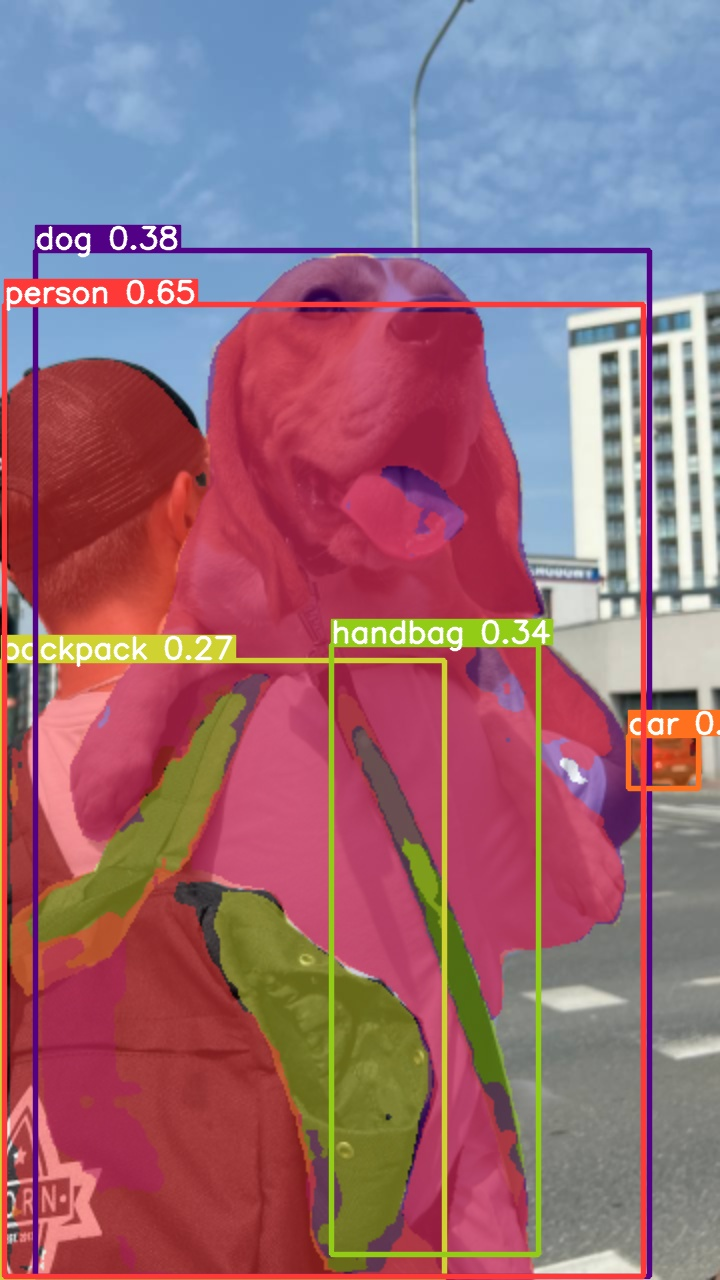

In [ ]:
# Menampilkan hasil deteksi gambar anjing
%cd {HOME}
Image(filename='runs/segment/predict/dog.jpeg', height=600)

### Python SDK

Menggunakan YOLOv8 pada environment Python.

In [ ]:
# Menyimpan output prediksi, yang mungkin mencakup informasi tentang objek yang terdeteksi (gambar anjing)
model = YOLO(f'{HOME}/yolov8s-seg.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 94.2ms
Speed: 0.7ms pre-process, 94.2ms inference, 543.7ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
# Mengambil koordinat kotak pembatas untuk objek yang terdeteksi pada prediksi YOLO
results[0].boxes.xyxy

tensor([[4.00000e+00, 3.04000e+02, 6.43000e+02, 1.27600e+03],
        [6.28000e+02, 7.35000e+02, 6.98000e+02, 7.88000e+02],
        [3.50000e+01, 2.50000e+02, 6.49000e+02, 1.27600e+03],
        [3.31000e+02, 6.44000e+02, 5.38000e+02, 1.25400e+03],
        [1.00000e+00, 6.60000e+02, 4.44000e+02, 1.27800e+03]], device='cuda:0')

In [ ]:
# Menampilkan skor keyakinan objek yang terdeteksi
results[0].boxes.conf

tensor([0.64894, 0.52386, 0.37839, 0.34418, 0.26679], device='cuda:0')

In [ ]:
# Menampilkan label kelas prediksi objek yang terdeteksi
results[0].boxes.cls

tensor([ 0.,  2., 16., 26., 24.], device='cuda:0')

In [ ]:
# Menampilkan prediksi binary masks objek yang terdeteksi
results[0].masks.masks

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

## Dataset




In [ ]:
# Mount drive untuk dapatkan akses ke google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Menambahkan path untuk lokasi folder projek
ROOT_PATH = "/content/drive/MyDrive/Colab Notebooks/UAS-ML"

In [ ]:
# mengubah direktori kerja saat ini ke folder UAS-ML
%cd "/content/drive/MyDrive/Colab Notebooks/UAS-ML"

/content/drive/MyDrive/Colab Notebooks/UAS-ML


In [ ]:
# Melihat data-data yang ada pada folder projek
!ls

data.yaml  runs  trash	yolov8s-seg.pt


## YOLOv8s

In [ ]:
# Training model YOLOv8s
!yolo task=segment mode=train model=yolov8s-seg.pt data=data.yaml epochs=10 imgsz=640 save=true

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None, workspace=4, nms=F

In [ ]:
# Menampilkan isi dari folder train pada folder runs YOLOv8s
!ls runs/segment/train/

args.yaml					    MaskP_curve.png   val_batch0_labels.jpg
BoxF1_curve.png					    MaskPR_curve.png  val_batch0_pred.jpg
BoxP_curve.png					    MaskR_curve.png   val_batch1_labels.jpg
BoxPR_curve.png					    results.csv       val_batch1_pred.jpg
BoxR_curve.png					    results.png       val_batch2_labels.jpg
confusion_matrix.png				    train_batch0.jpg  val_batch2_pred.jpg
events.out.tfevents.1702999686.1dd7895dd360.7482.0  train_batch1.jpg  weights
MaskF1_curve.png				    train_batch2.jpg


In [ ]:
# Import library untuk menampilkan gambar
from IPython.display import Image

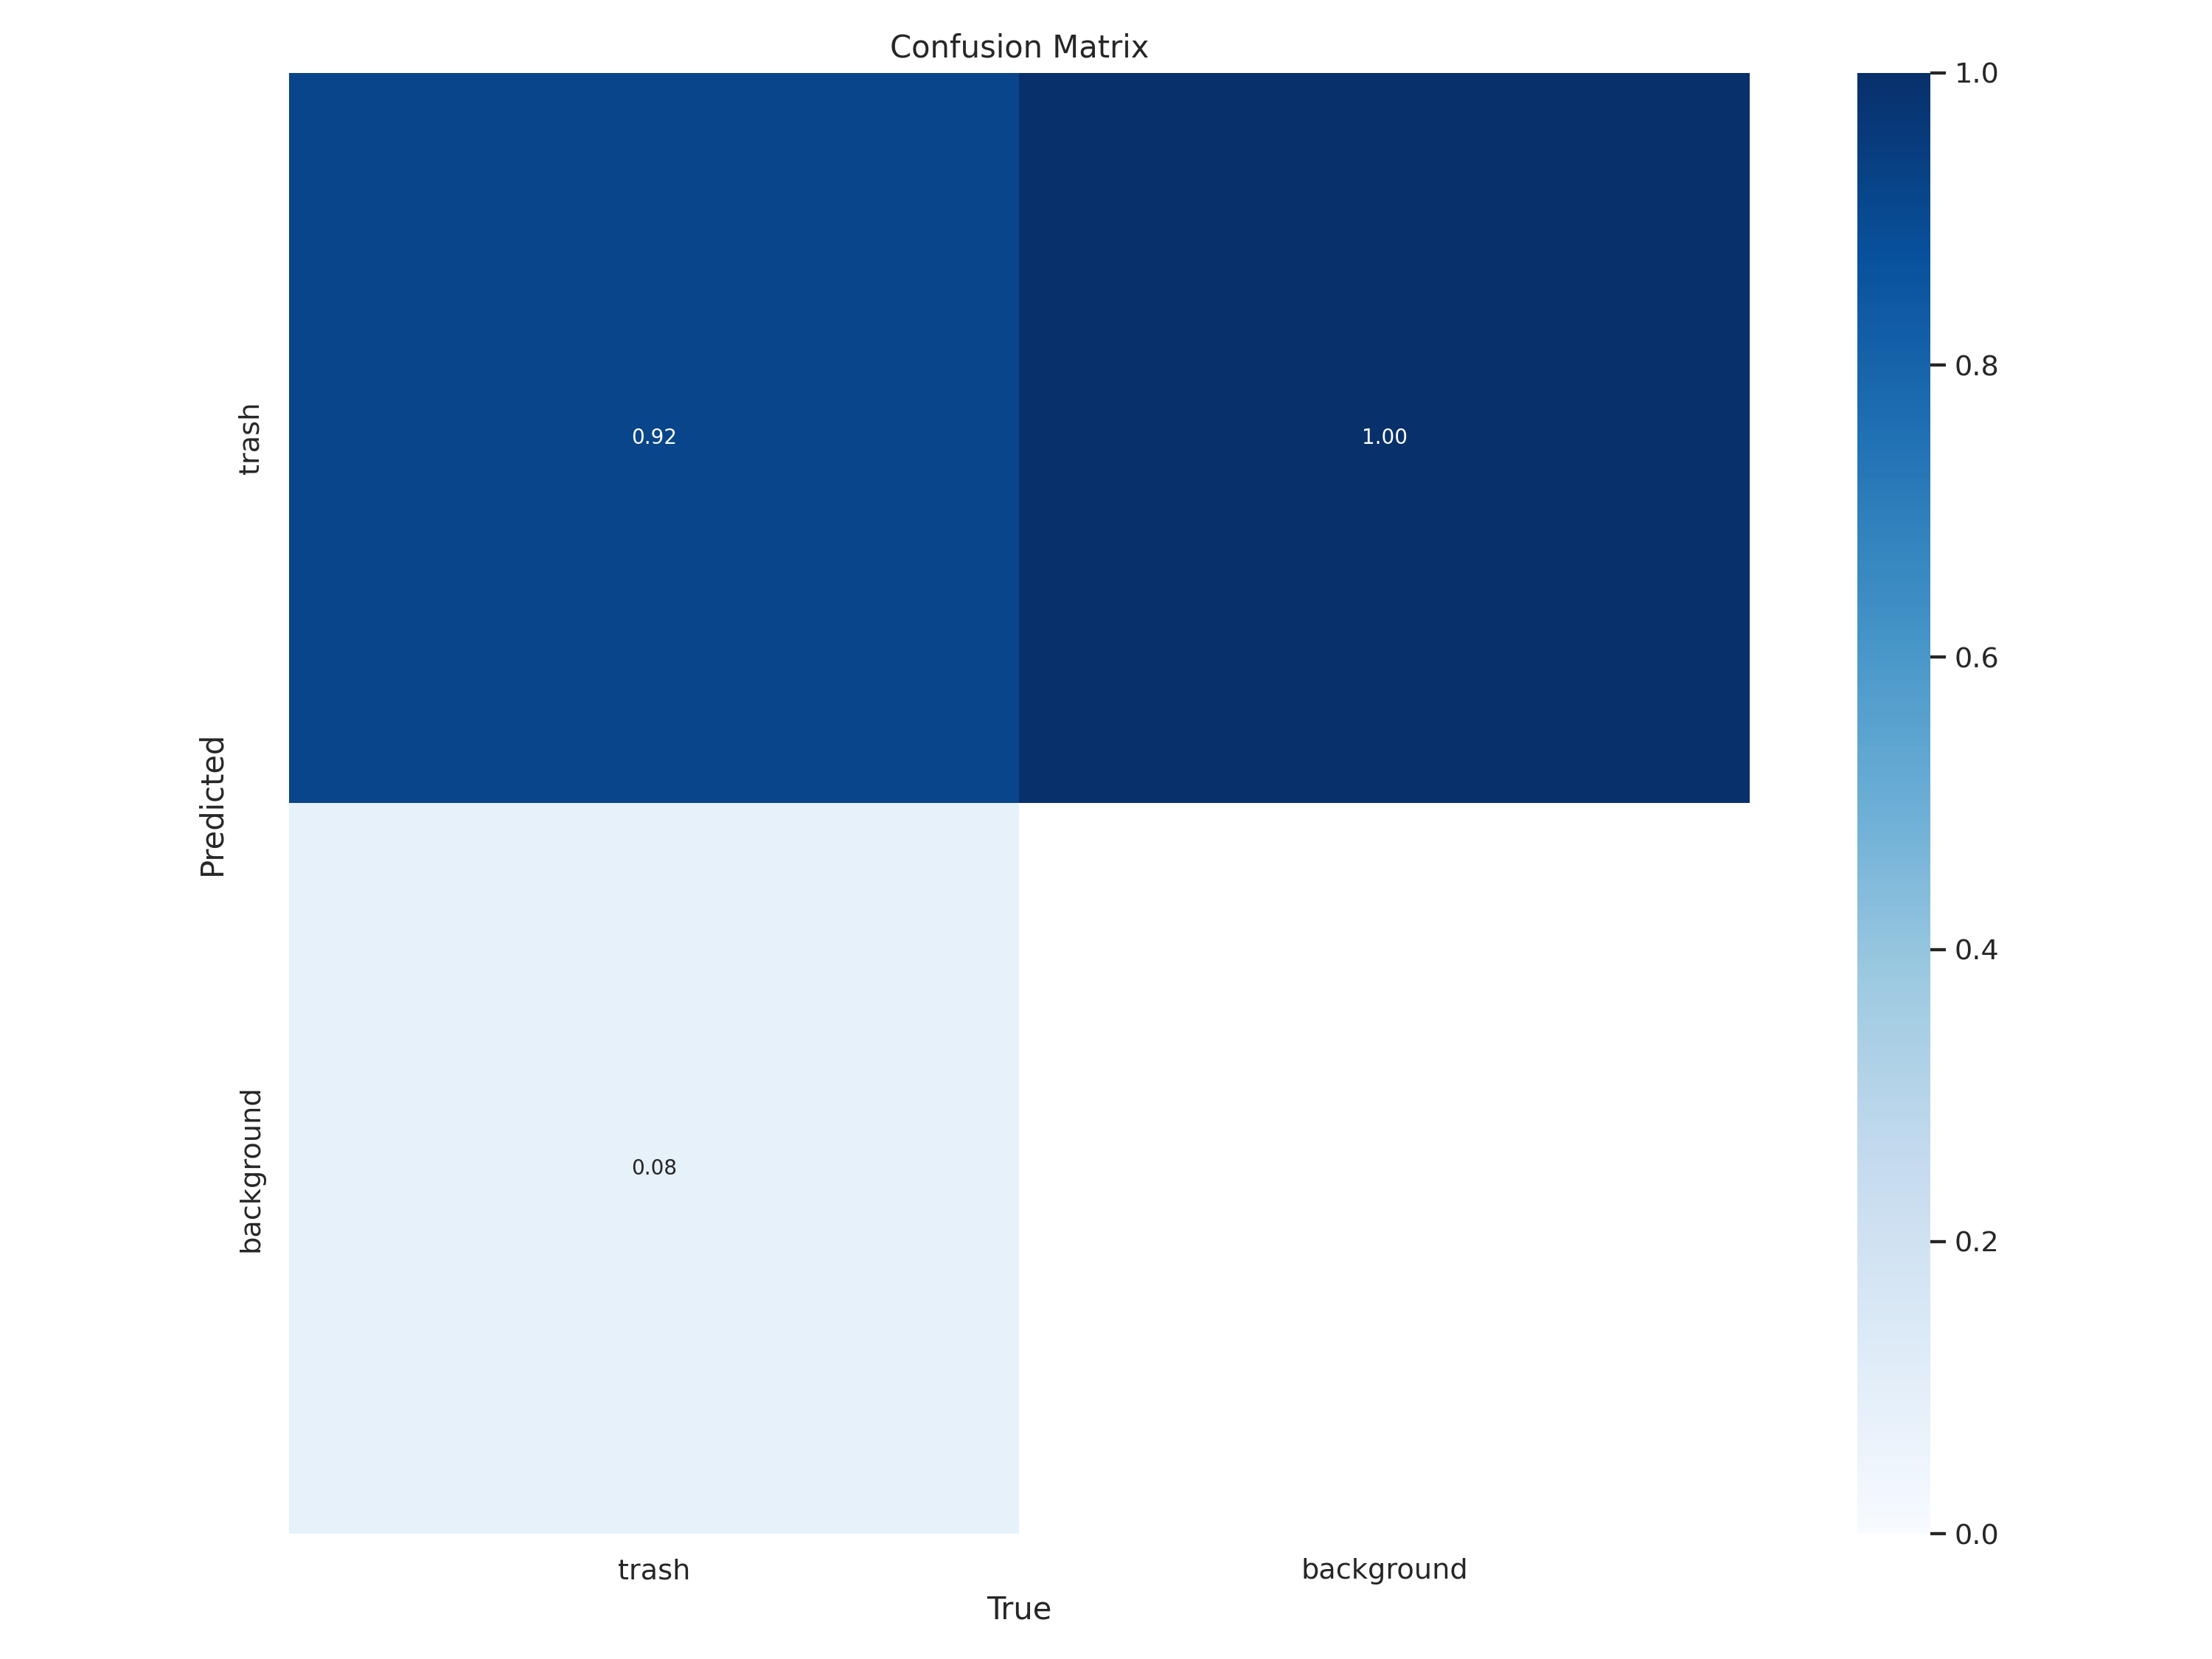

In [ ]:
# Menampilkan gambar confusion matrix YOLOv8s
Image(filename=f'runs/segment/train/confusion_matrix.png', width=600)

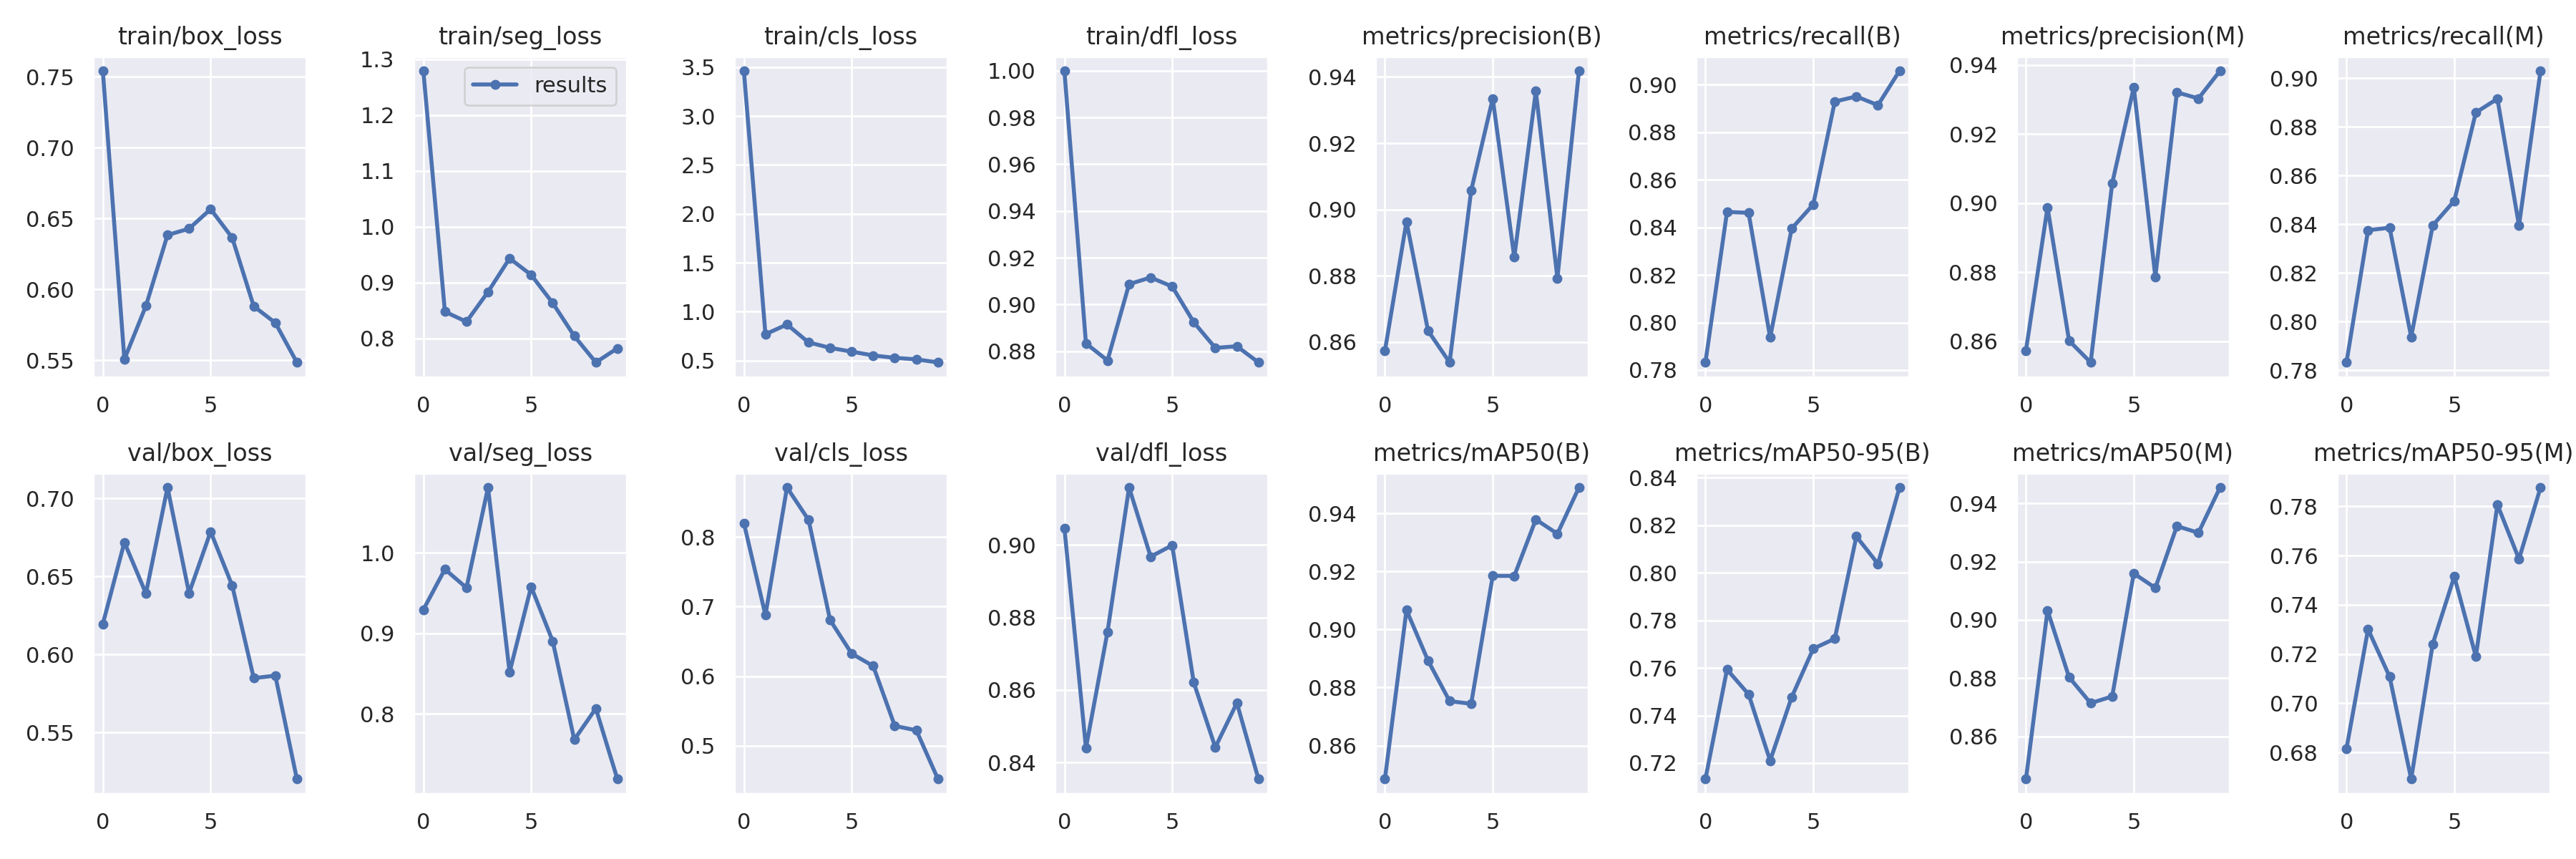

In [ ]:
# Menampilkan gambar grafik-grafik variasi metrik YOLOv8s
Image(filename=f'runs/segment/train/results.png', width=600)

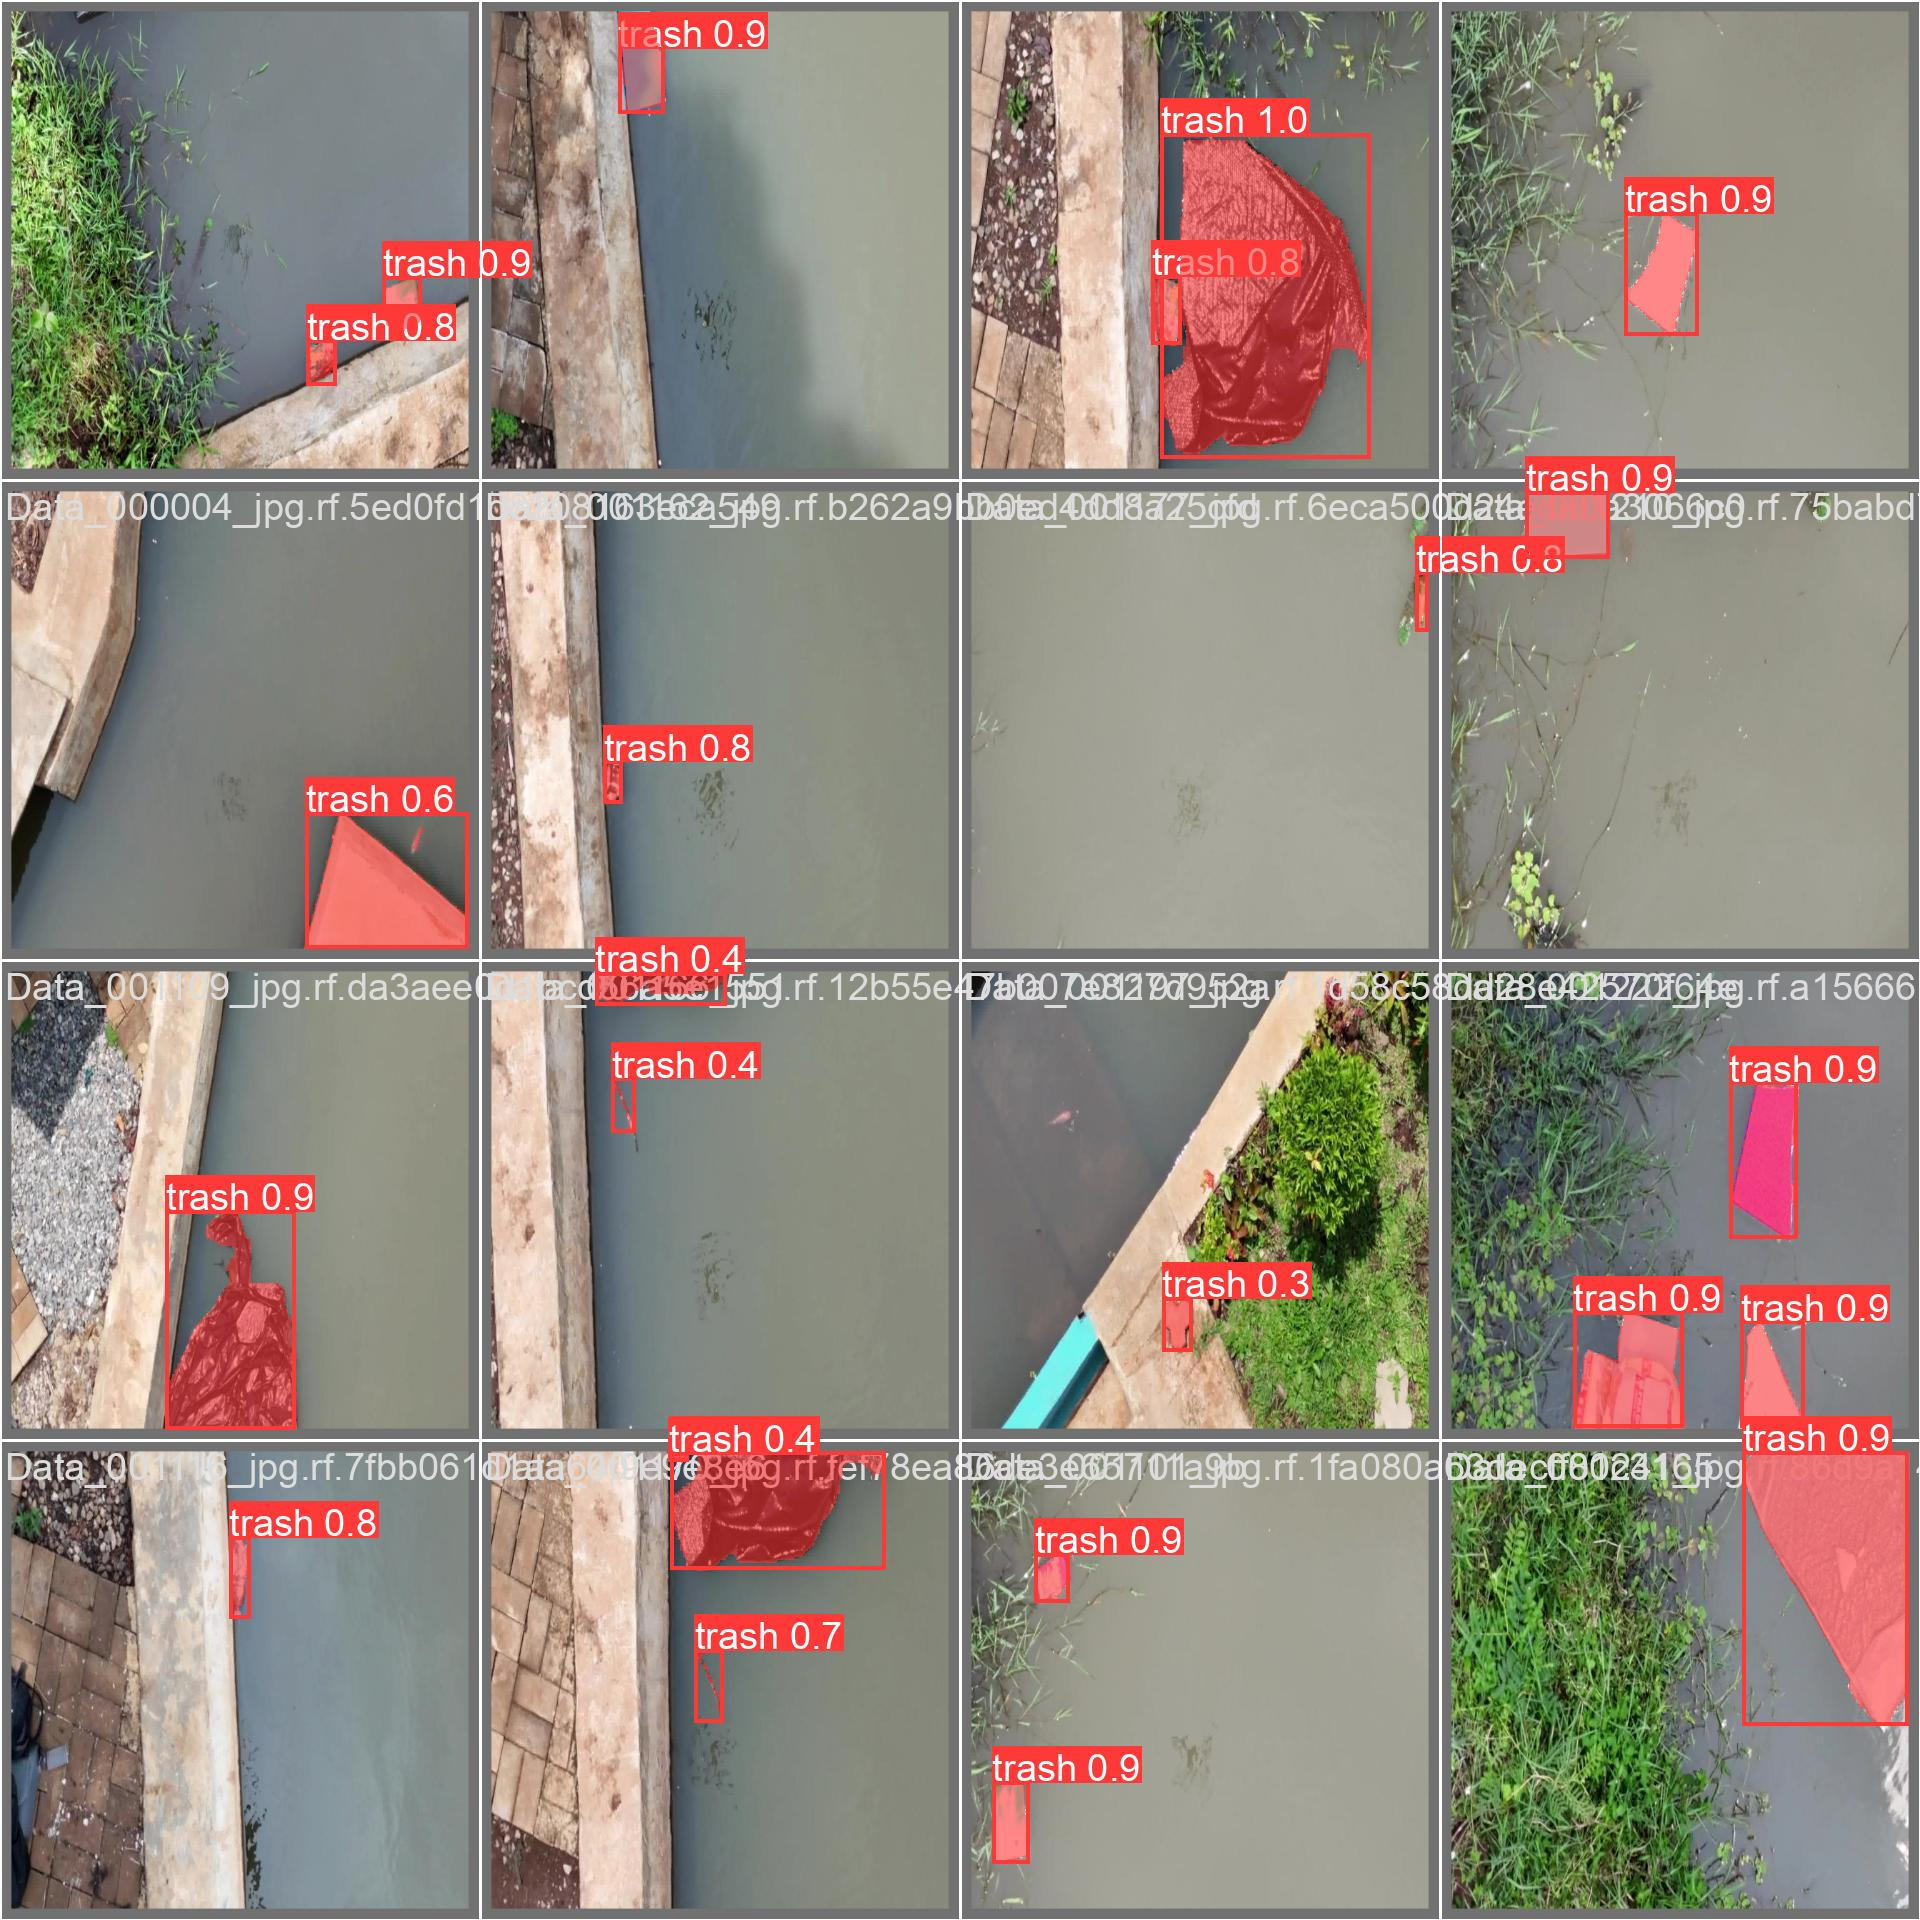

In [ ]:
# Menampilkan gambar hasil prediksi validasi YOLOv8s
Image(filename=f'runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
# Menilai kinerja model segmentasi pada kumpulan data validasi YOLOv8s
!yolo task=segment mode=val model=runs/segment/train/weights/best.pt data=data.yaml

2023-12-20 23:43:34.718798: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-20 23:43:34.718852: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-20 23:43:34.720127: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-20 23:43:35.800811: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/drive/MyDrive/Colab Notebooks/UAS-ML/trash/v

## Inference with Custom Model

In [ ]:
# Melakukan prediksi pada gambar test set
!yolo task=segment mode=predict model=runs/segment/train/weights/best.pt conf=0.25 source=trash/test/images save=true

2023-12-20 23:44:22.022500: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-20 23:44:22.022562: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-20 23:44:22.024156: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-20 23:44:23.619450: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

image 1/99 /content/drive/MyDrive/Colab Notebooks/UAS-ML/trash/tes

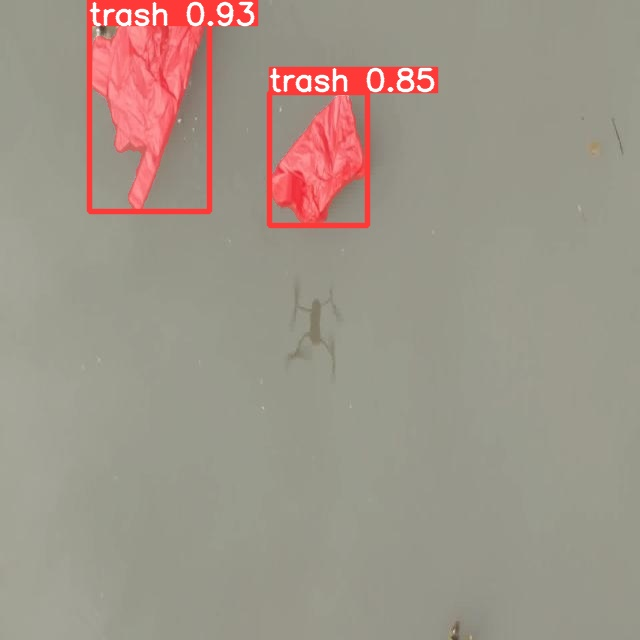

In [ ]:
# Menampilkan gambar hasil prediksi pada test set YOLOv8s
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict8/Data_000259_jpg.rf.dc4fb855338773ad8ae4a039213f7ac6.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

#YOLOv8M


In [ ]:
# Memuat model segmentasi YOLOv8m
model_m = YOLO(f'{HOME}/yolov8m-seg.pt')

100%|██████████| 52.4M/52.4M [00:00<00:00, 197MB/s]


In [ ]:
# Training model YOLOv8m
!yolo task=segment mode=train model=yolov8m-seg.pt data=data.yaml epochs=10 imgsz=640 save=true

100% 52.4M/52.4M [00:00<00:00, 149MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simpli

In [ ]:
# Menampilkan isi dari folder train3 pada folder runs YOLOv8m
!ls runs/segment/train3/

args.yaml					    MaskP_curve.png   val_batch0_labels.jpg
BoxF1_curve.png					    MaskPR_curve.png  val_batch0_pred.jpg
BoxP_curve.png					    MaskR_curve.png   val_batch1_labels.jpg
BoxPR_curve.png					    results.csv       val_batch1_pred.jpg
BoxR_curve.png					    results.png       val_batch2_labels.jpg
confusion_matrix.png				    train_batch0.jpg  val_batch2_pred.jpg
events.out.tfevents.1703109417.36941b6788f3.4288.0  train_batch1.jpg  weights
MaskF1_curve.png				    train_batch2.jpg


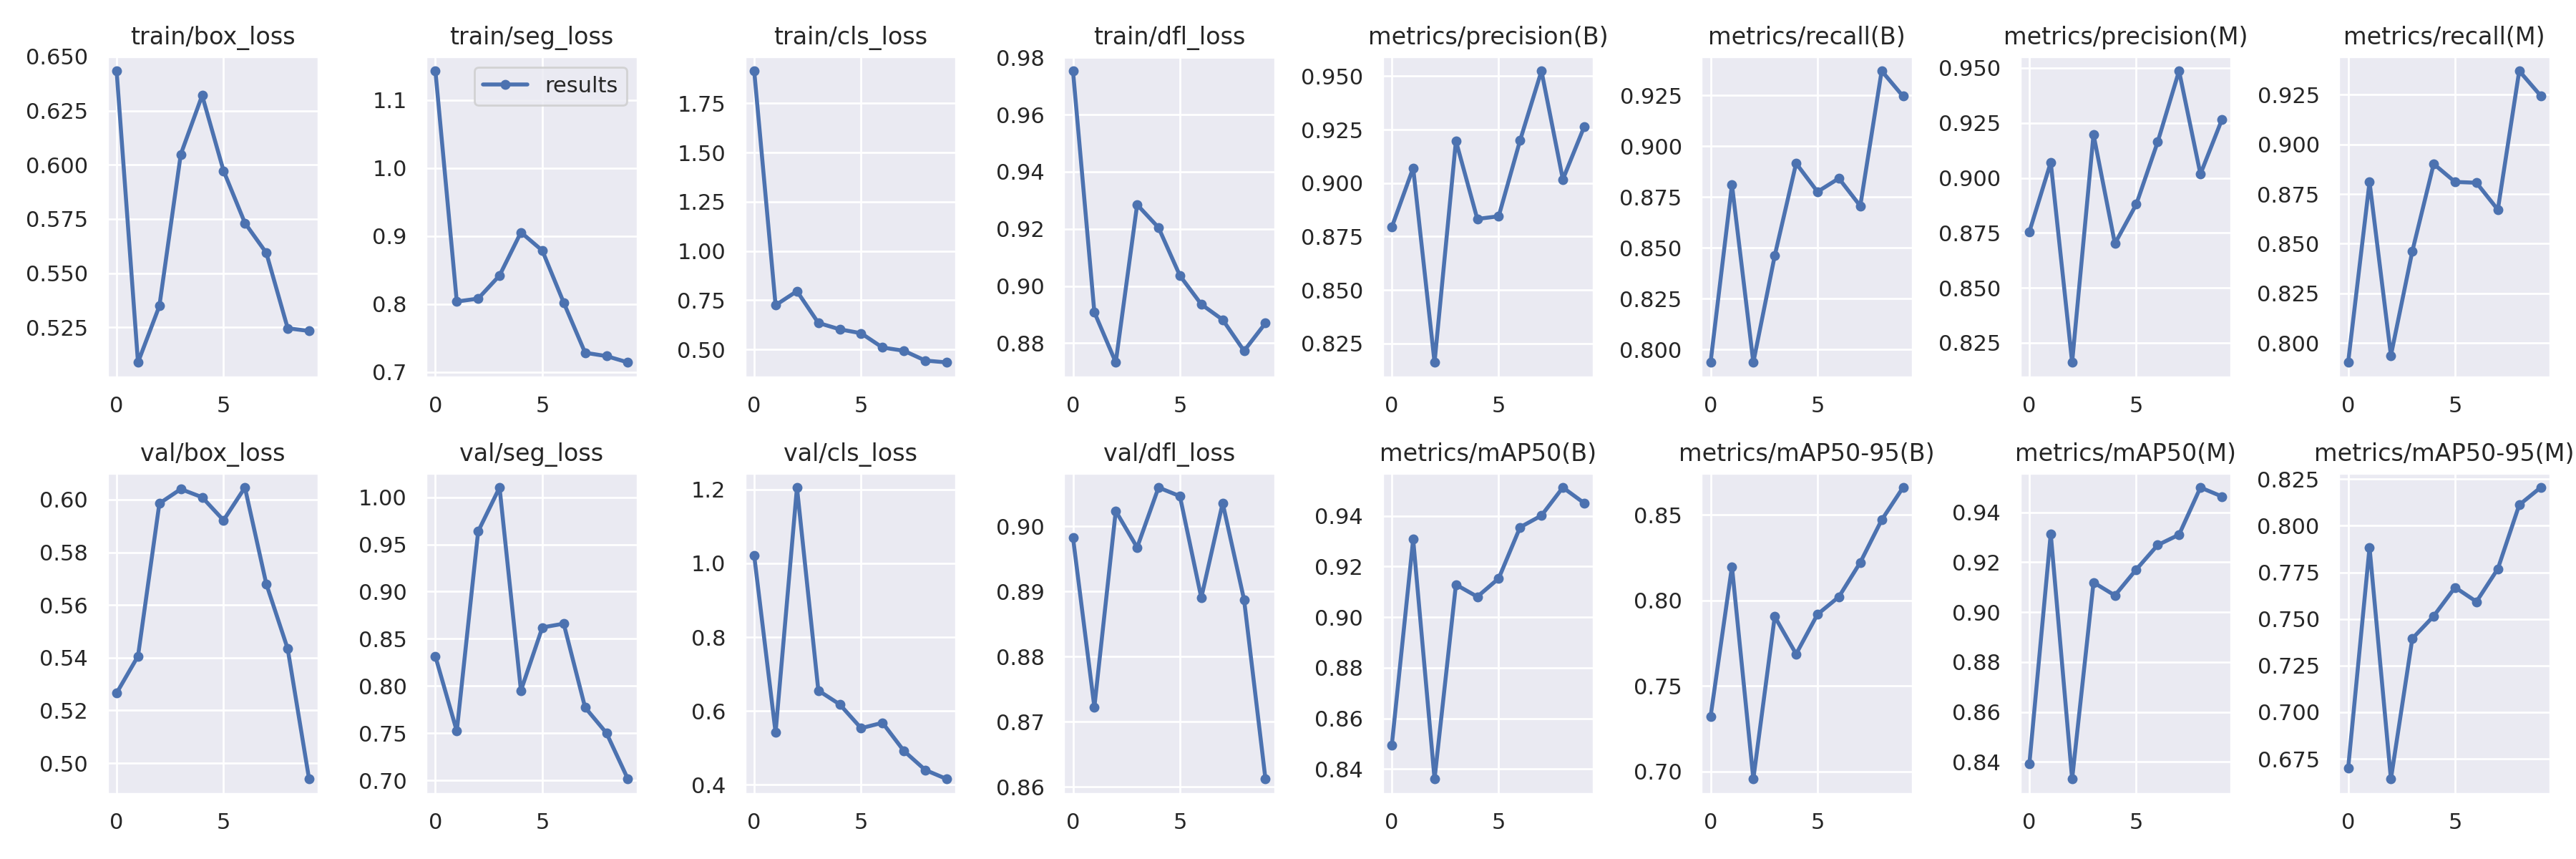

In [ ]:
# Menampilkan gambar grafik-grafik variasi metrik YOLOv8m
Image(filename=f'runs/segment/train3/results.png', width=600)

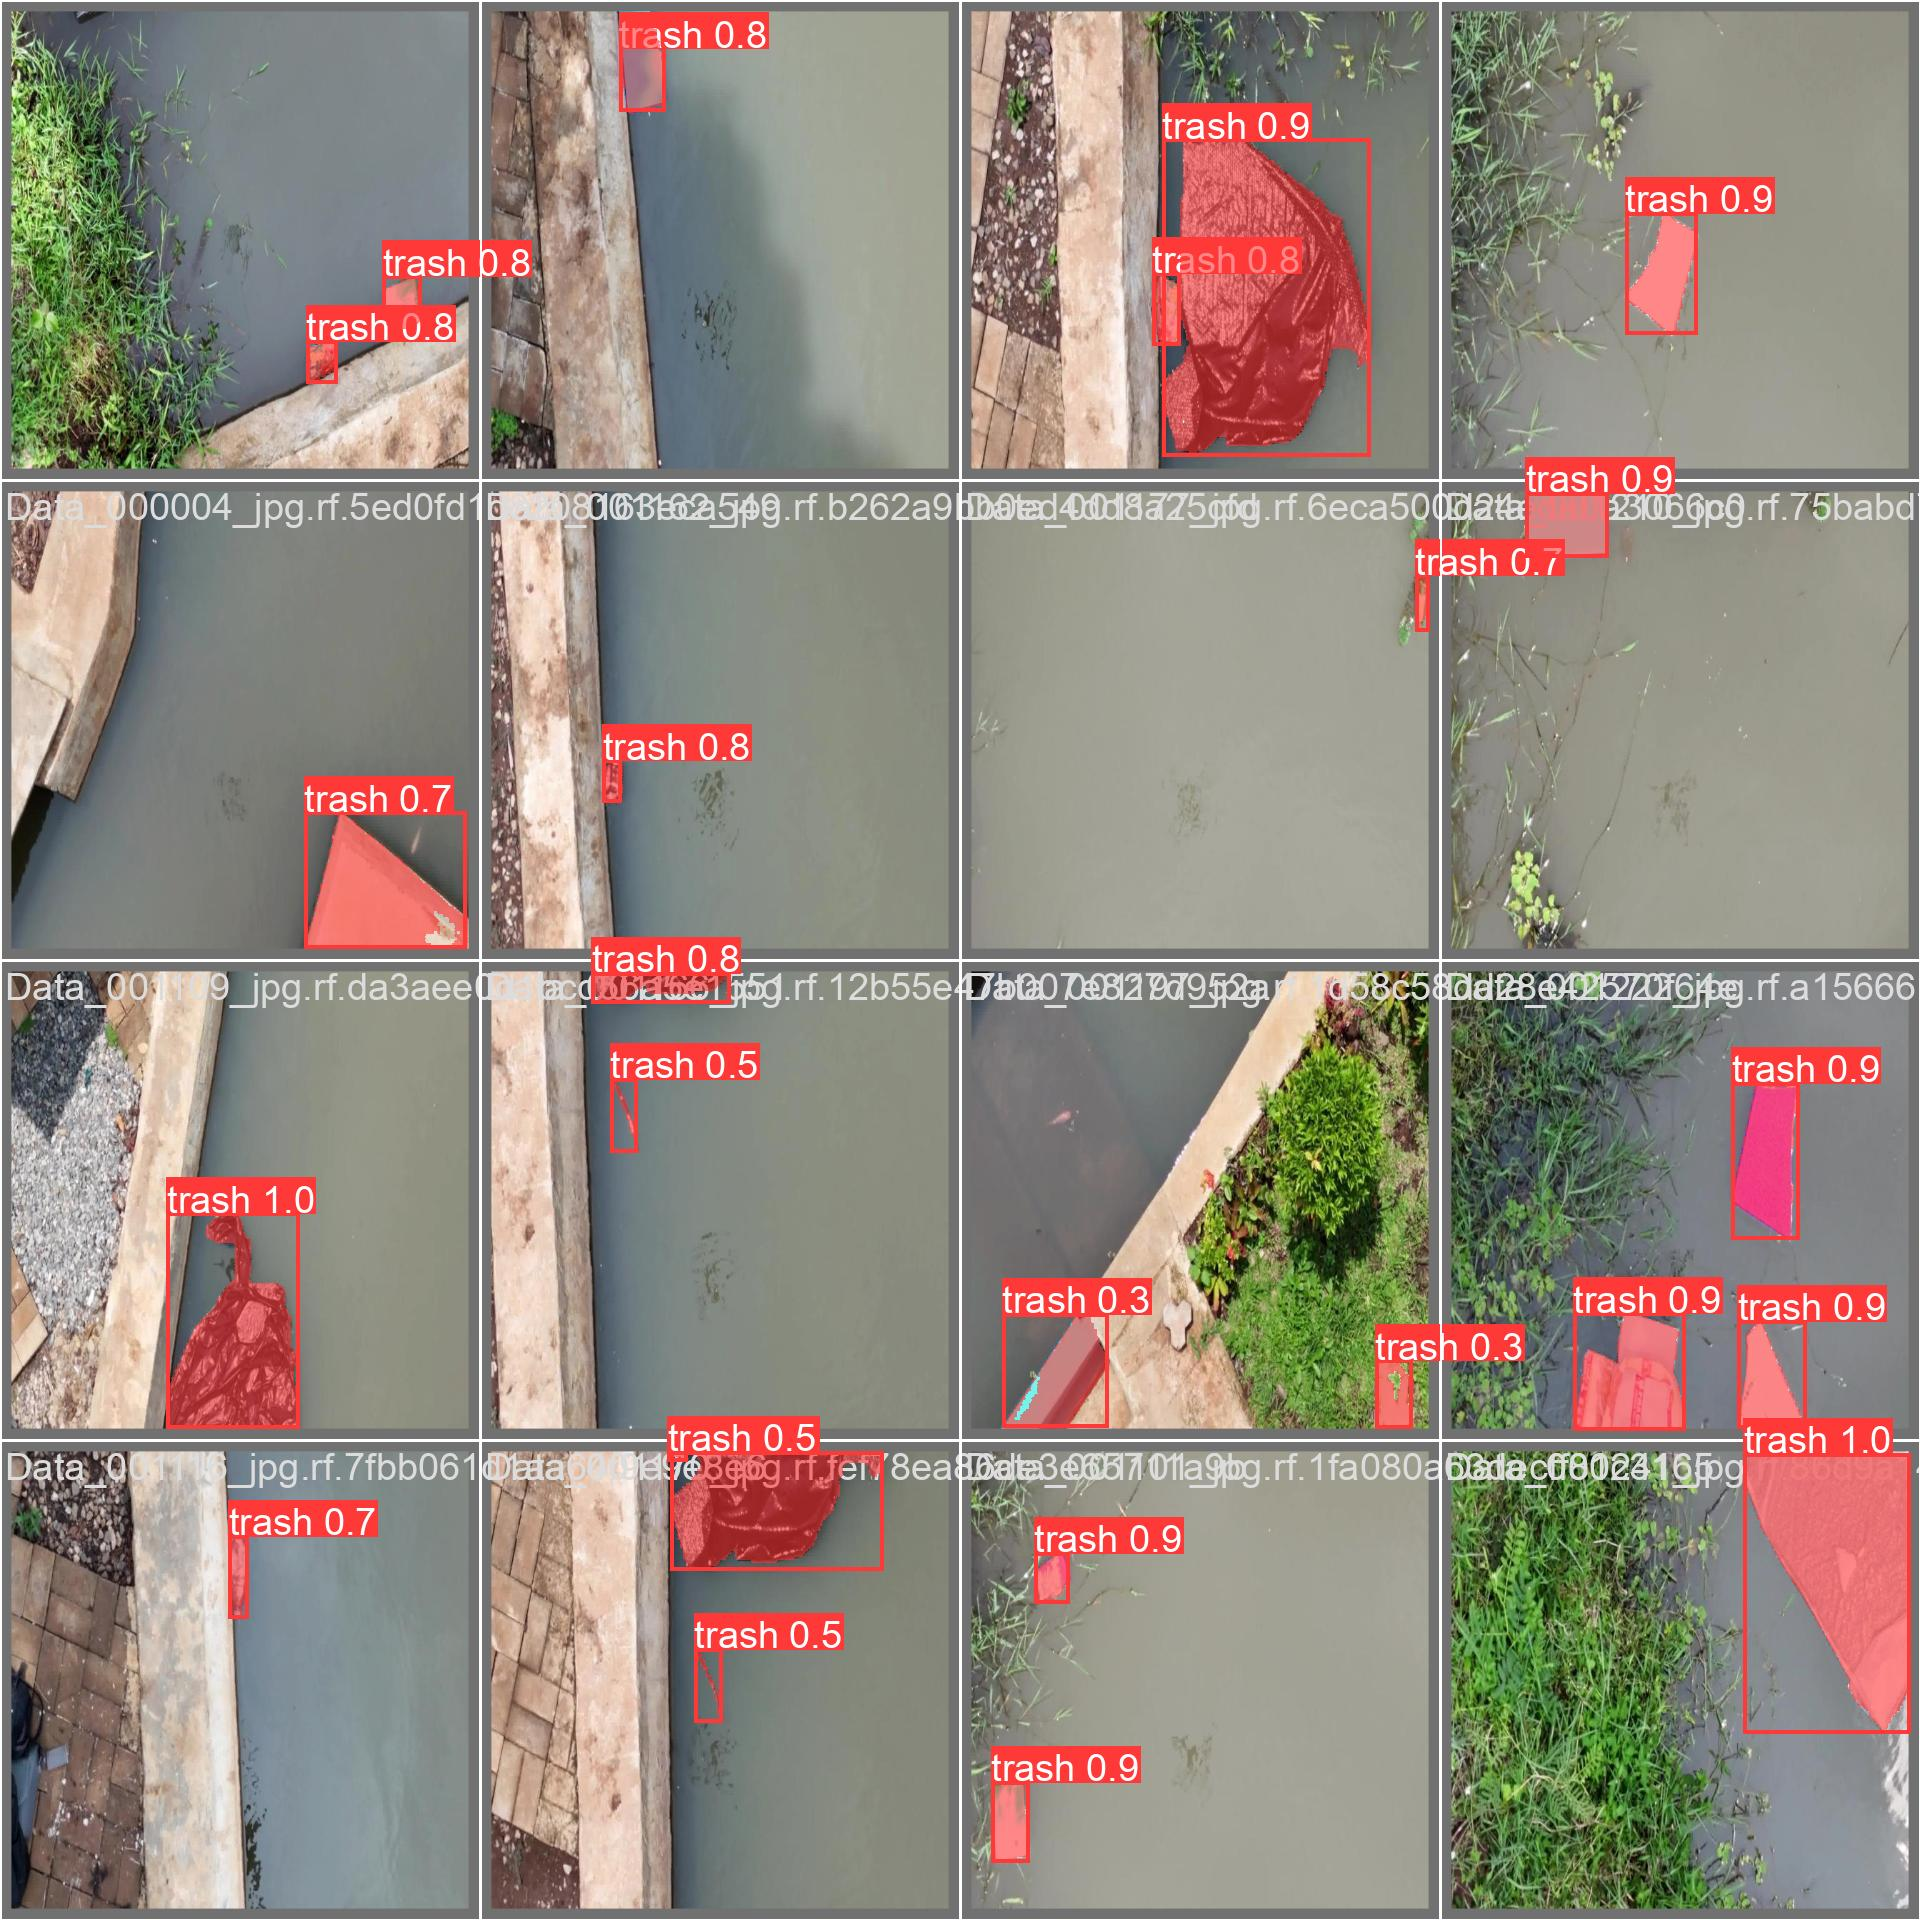

In [ ]:
# Menampilkan gambar hasil prediksi validasi YOLOv8m
Image(filename=f'runs/segment/train3/val_batch0_pred.jpg', width=600)

In [ ]:
# Menilai kinerja model segmentasi pada kumpulan data validasi YOLOv8m
!yolo task=segment mode=val model=runs/segment/train3/weights/best.pt data=data.yaml

2023-12-20 22:04:58.351762: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-20 22:04:58.351816: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-20 22:04:58.353151: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-20 22:04:59.449877: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /content/drive/MyDrive/Colab Notebooks/UAS-ML/trash/

In [ ]:
# Melakukan prediksi pada gambar test set YOLOv8m
!yolo task=segment mode=predict model=runs/segment/train3/weights/best.pt conf=0.25 source=trash/test/images save=true

2023-12-21 00:02:39.655959: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-21 00:02:39.656036: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-21 00:02:39.657604: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-21 00:02:41.218882: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs

image 1/99 /content/drive/MyDrive/Colab Notebooks/UAS-ML/trash/te

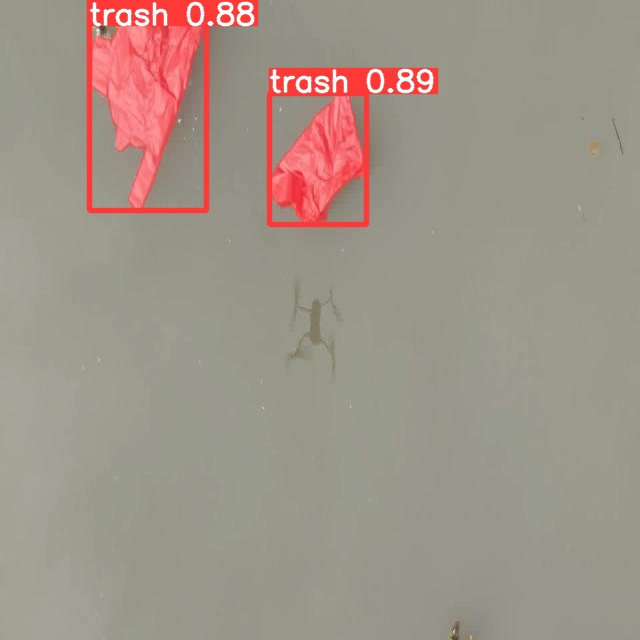

In [ ]:
# Menampilkan gambar hasil prediksi pada test set YOLOv8m
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict11/Data_000259_jpg.rf.dc4fb855338773ad8ae4a039213f7ac6.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

## YOLOv8n

In [ ]:
# Memuat model segmentasi YOLOv8n
model_n = YOLO(f'{HOME}/yolov8n-seg.pt')

100%|██████████| 6.73M/6.73M [00:00<00:00, 80.2MB/s]


In [ ]:
# Training model YOLOv8n
!yolo task=segment mode=train model=yolov8n-seg.pt data=data.yaml epochs=10 imgsz=640 save=true

100% 6.73M/6.73M [00:00<00:00, 83.6MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simpl

In [ ]:
# Menampilkan isi dari folder train4 pada folder runs YOLOv8n
!ls runs/segment/train4/

args.yaml					    MaskP_curve.png   val_batch0_labels.jpg
BoxF1_curve.png					    MaskPR_curve.png  val_batch0_pred.jpg
BoxP_curve.png					    MaskR_curve.png   val_batch1_labels.jpg
BoxPR_curve.png					    results.csv       val_batch1_pred.jpg
BoxR_curve.png					    results.png       val_batch2_labels.jpg
confusion_matrix.png				    train_batch0.jpg  val_batch2_pred.jpg
events.out.tfevents.1703109946.36941b6788f3.6964.0  train_batch1.jpg  weights
MaskF1_curve.png				    train_batch2.jpg


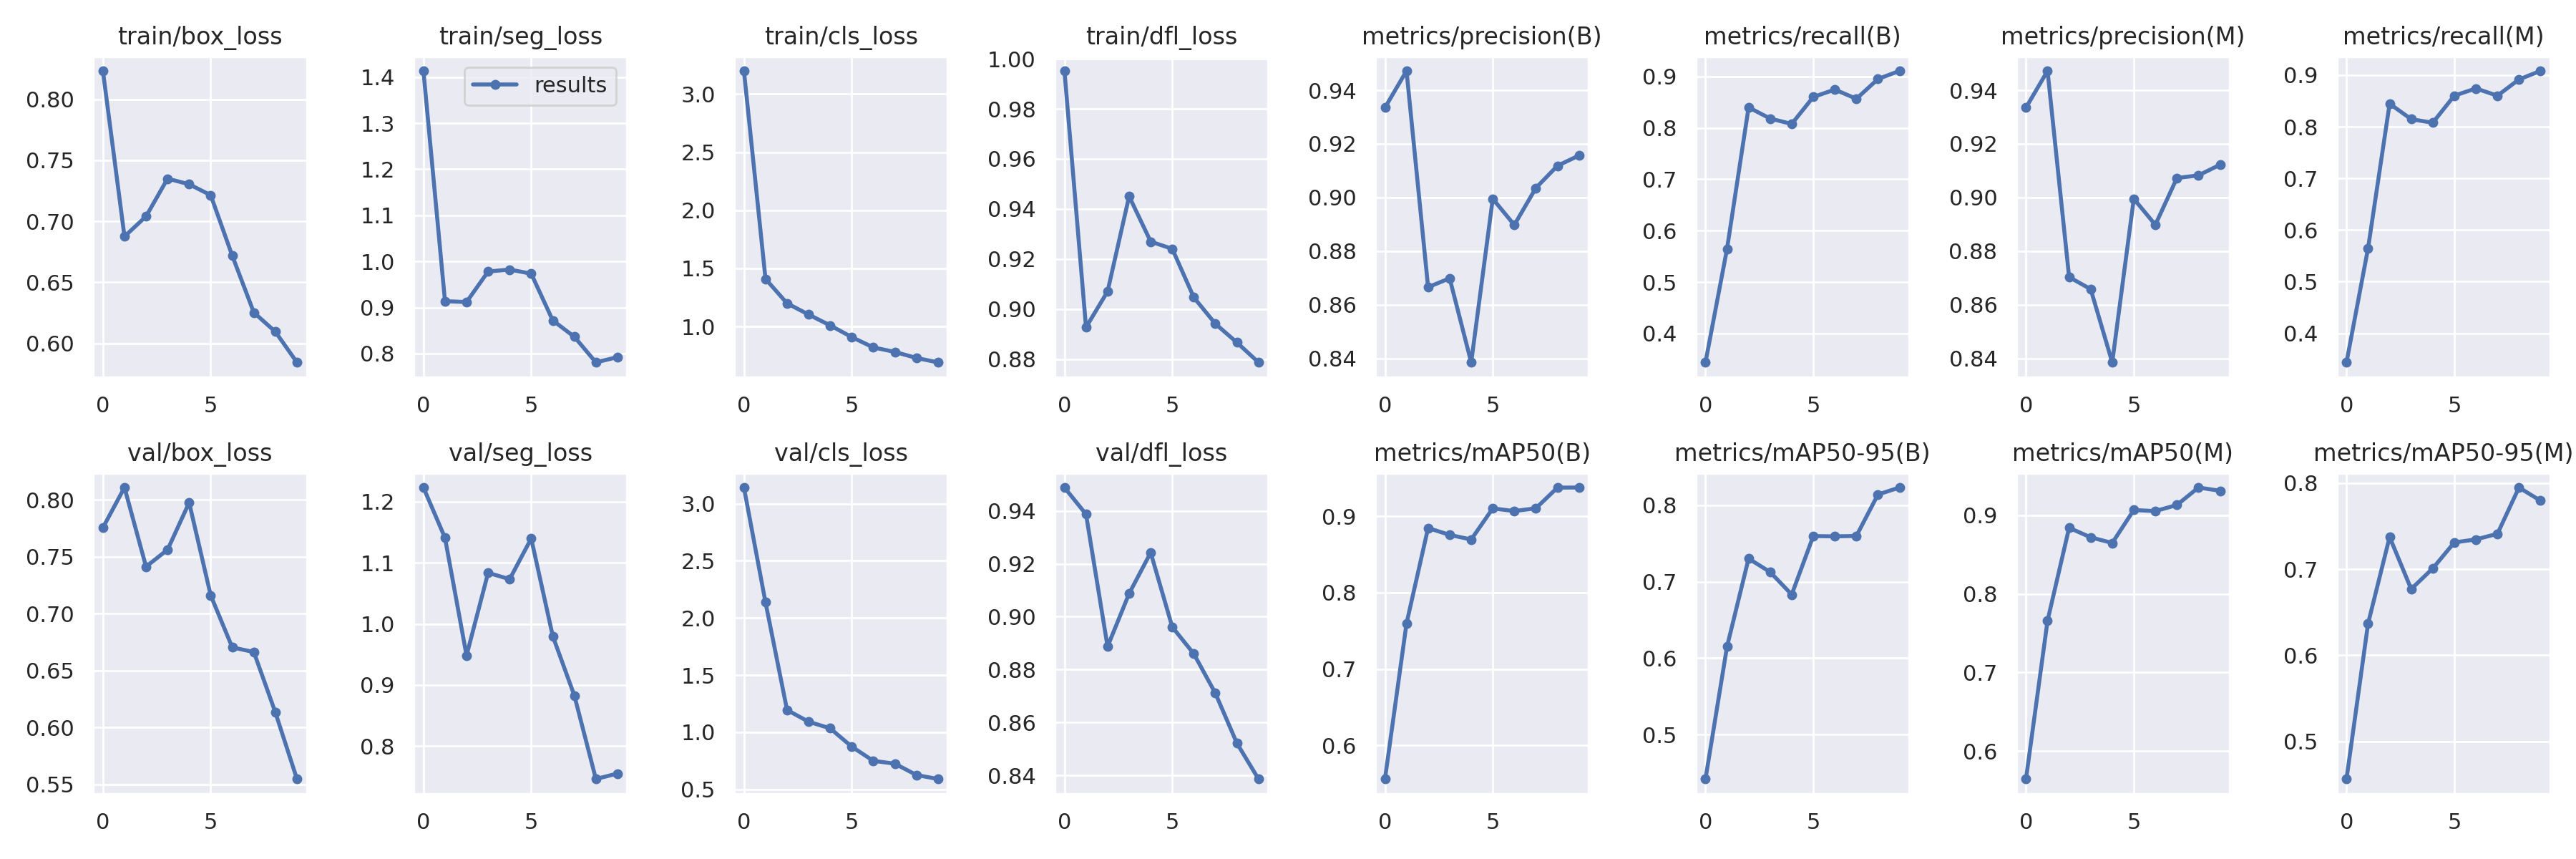

In [ ]:
# Menampilkan gambar grafik-grafik variasi metrik YOLOv8n
Image(filename=f'runs/segment/train4/results.png', width=600)

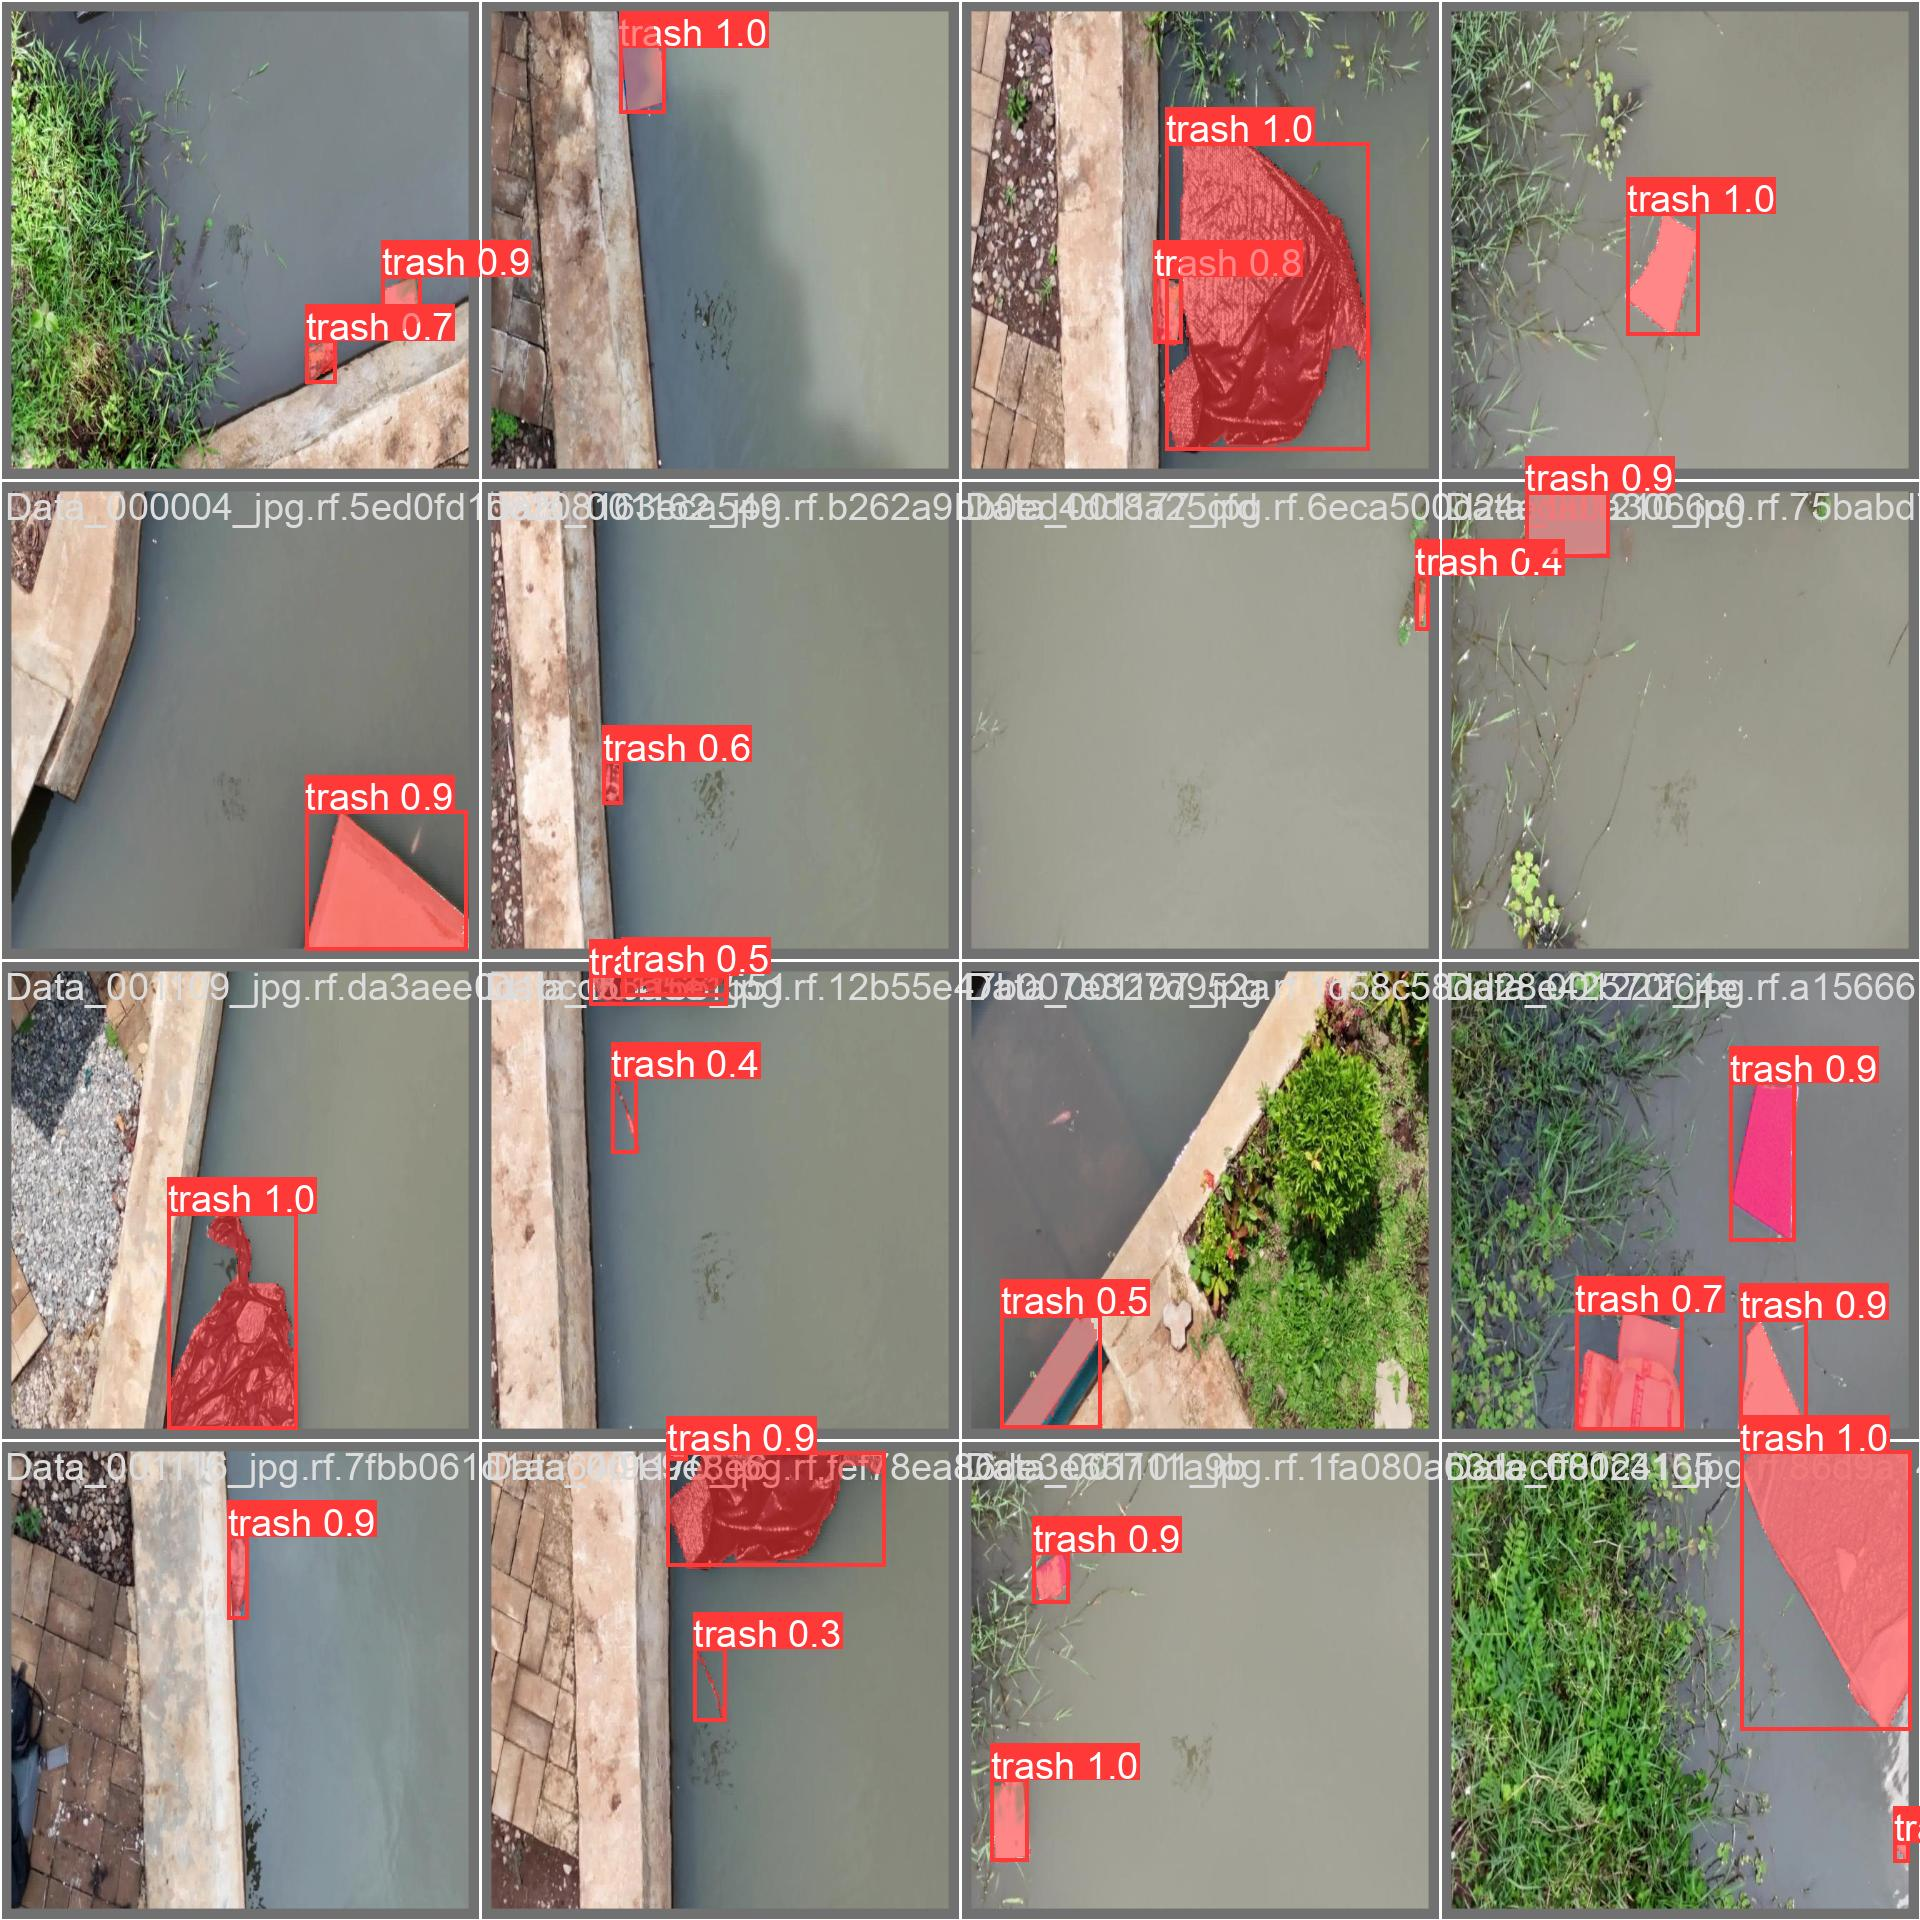

In [ ]:
# Menampilkan gambar hasil prediksi validasi YOLOv8n
Image(filename=f'runs/segment/train4/val_batch0_pred.jpg', width=600)

In [ ]:
# Menilai kinerja model segmentasi pada kumpulan data validasi YOLOv8n
!yolo task=segment mode=val model=runs/segment/train4/weights/best.pt data=data.yaml

2023-12-20 22:11:04.439633: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-20 22:11:04.439692: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-20 22:11:04.441036: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-20 22:11:05.561419: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /content/drive/MyDrive/Colab Notebooks/UAS-ML/trash/va

In [ ]:
# Melakukan prediksi pada gambar test set YOLOv8n
!yolo task=segment mode=predict model=runs/segment/train4/weights/best.pt conf=0.25 source=trash/test/images save=true

2023-12-20 22:11:30.237856: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-20 22:11:30.237910: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-20 22:11:30.239227: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-20 22:11:31.361799: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs

image 1/99 /content/drive/MyDrive/Colab Notebooks/UAS-ML/trash/test

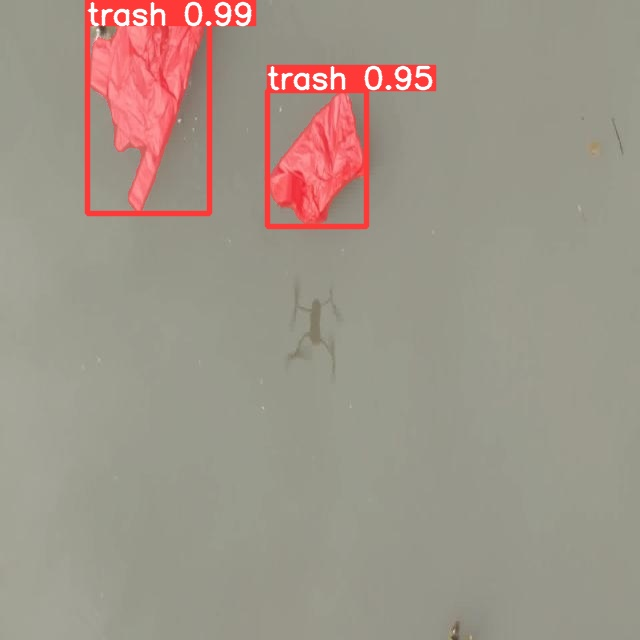

In [ ]:
# Menampilkan gambar hasil prediksi pada test set YOLOv8n
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict4/Data_000259_jpg.rf.dc4fb855338773ad8ae4a039213f7ac6.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")



## YOLOv8l

In [ ]:
# Memuat model segmentasi YOLOv8l
model_l = YOLO(f'{HOME}/yolov8l-seg.pt')

100%|██████████| 88.1M/88.1M [00:00<00:00, 237MB/s]


In [ ]:
# Training model YOLOv8l
!yolo task=segment mode=train model=yolov8l-seg.pt data=data.yaml epochs=10 imgsz=640 save=true

100% 88.1M/88.1M [00:00<00:00, 157MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simpli

In [ ]:
# Menampilkan isi dari folder train5 pada folder runs YOLOv8l
!ls runs/segment/train5/

args.yaml					    MaskP_curve.png   val_batch0_labels.jpg
BoxF1_curve.png					    MaskPR_curve.png  val_batch0_pred.jpg
BoxP_curve.png					    MaskR_curve.png   val_batch1_labels.jpg
BoxPR_curve.png					    results.csv       val_batch1_pred.jpg
BoxR_curve.png					    results.png       val_batch2_labels.jpg
confusion_matrix.png				    train_batch0.jpg  val_batch2_pred.jpg
events.out.tfevents.1703110311.36941b6788f3.8906.0  train_batch1.jpg  weights
MaskF1_curve.png				    train_batch2.jpg


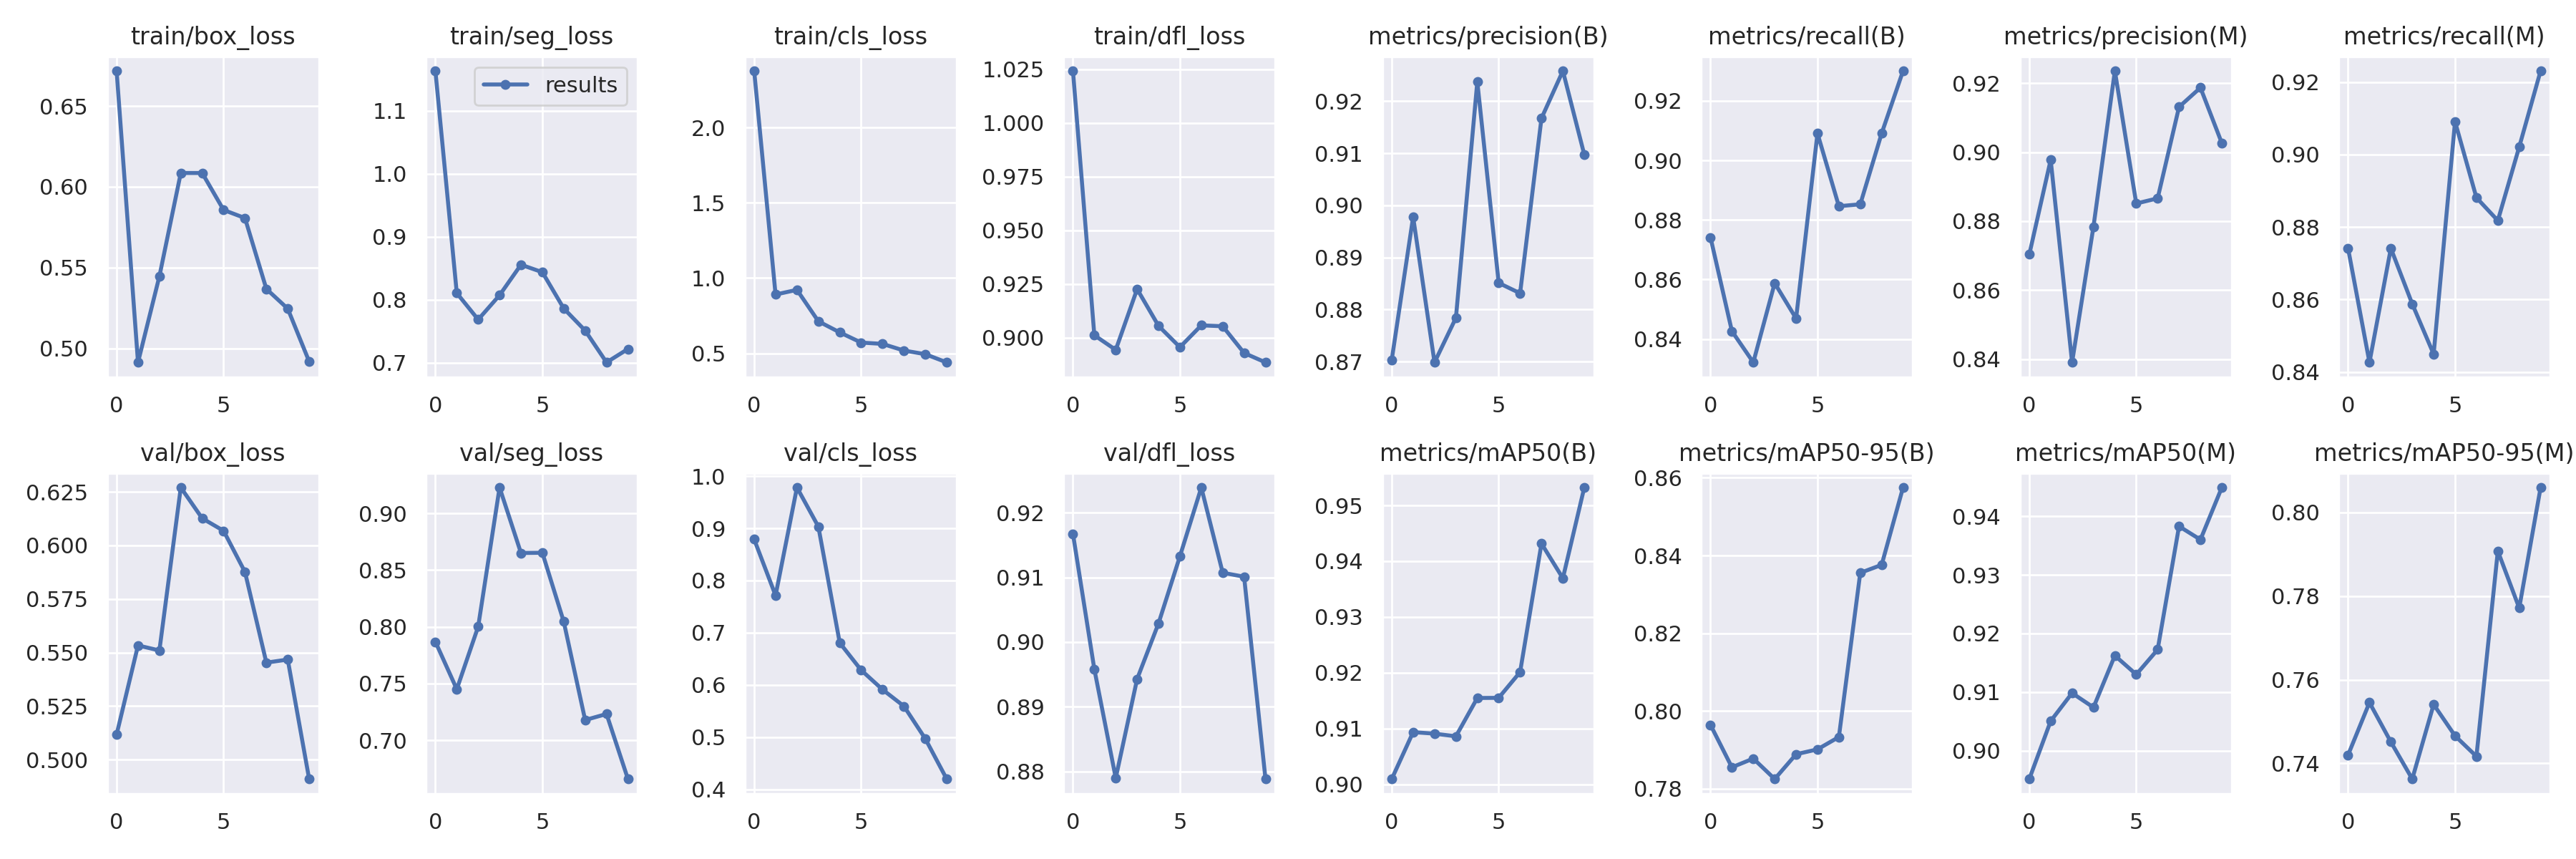

In [ ]:
# Menampilkan gambar grafik-grafik variasi metrik YOLOv8l
Image(filename=f'runs/segment/train5/results.png', width=600)

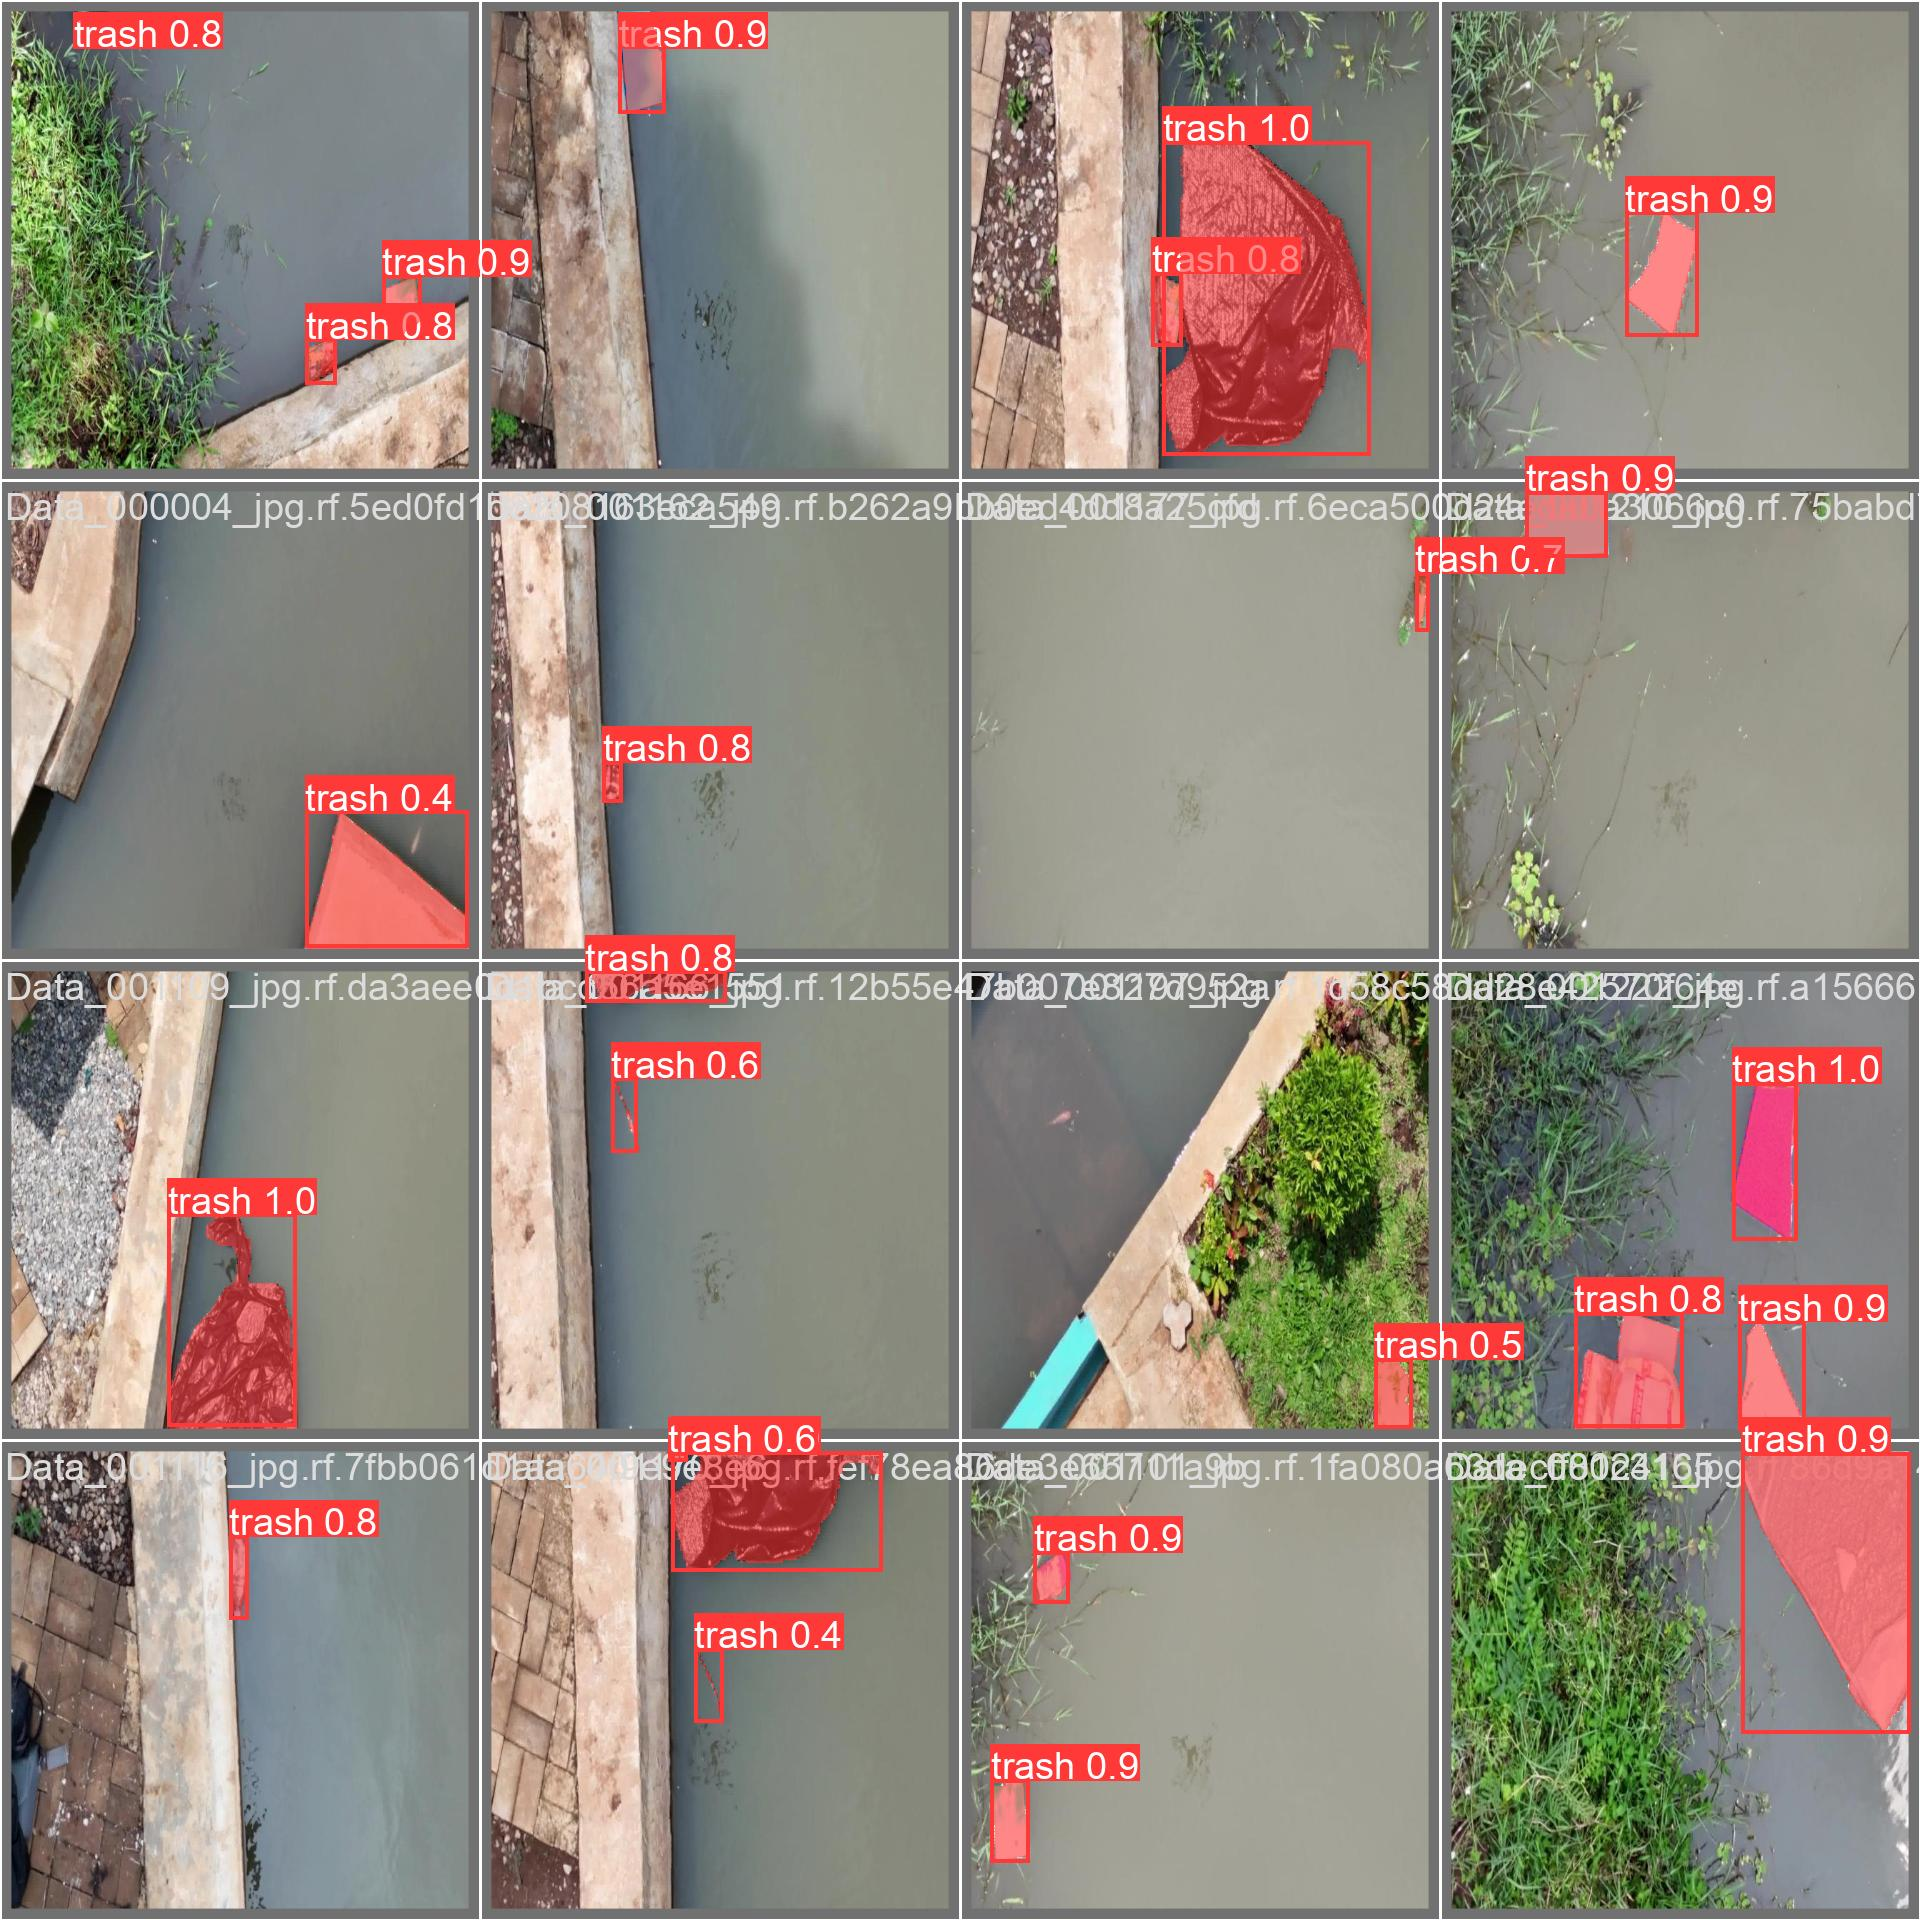

In [ ]:
# Menampilkan gambar hasil prediksi validasi YOLOv8l
Image(filename=f'runs/segment/train5/val_batch0_pred.jpg', width=600)

In [ ]:
# Menilai kinerja model segmentasi pada kumpulan data validasi YOLOv8l
!yolo task=segment mode=val model=runs/segment/train5/weights/best.pt data=data.yaml

2023-12-20 22:22:23.865637: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-20 22:22:23.865693: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-20 22:22:23.867016: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-20 22:22:25.053921: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs
val: Scanning /content/drive/MyDrive/Colab Notebooks/UAS-ML/trash/

In [ ]:
# Melakukan prediksi pada gambar test set YOLOv8l
!yolo task=segment mode=predict model=runs/segment/train5/weights/best.pt conf=0.25 source=trash/test/images save=true

2023-12-21 00:00:22.789641: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-21 00:00:22.789694: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-21 00:00:22.791010: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-21 00:00:23.919651: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs

image 1/99 /content/drive/MyDrive/Colab Notebooks/UAS-ML/trash/te

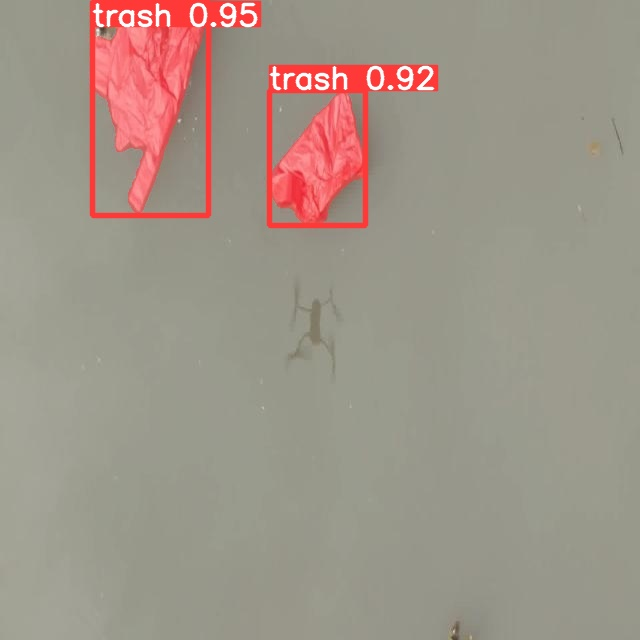

In [ ]:
# Menampilkan gambar hasil prediksi pada test set YOLOv8l
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict10/Data_000259_jpg.rf.dc4fb855338773ad8ae4a039213f7ac6.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")



## YOLOv8x

In [ ]:
# Memuat model segmentasi YOLOv8x
model_x = YOLO(f'{HOME}/yolov8x-seg.pt')

In [ ]:
# Training model YOLOv8x
!yolo task=segment mode=train model=yolov8x-seg.pt data=data.yaml epochs=10 imgsz=640 save=true

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None, workspace=4, nms=F

In [ ]:
# Menampilkan isi dari folder train7 pada folder runs YOLOv8x
!ls runs/segment/train7/

args.yaml					     MaskP_curve.png   val_batch0_labels.jpg
BoxF1_curve.png					     MaskPR_curve.png  val_batch0_pred.jpg
BoxP_curve.png					     MaskR_curve.png   val_batch1_labels.jpg
BoxPR_curve.png					     results.csv       val_batch1_pred.jpg
BoxR_curve.png					     results.png       val_batch2_labels.jpg
confusion_matrix.png				     train_batch0.jpg  val_batch2_pred.jpg
events.out.tfevents.1703113089.36941b6788f3.21132.0  train_batch1.jpg  weights
MaskF1_curve.png				     train_batch2.jpg


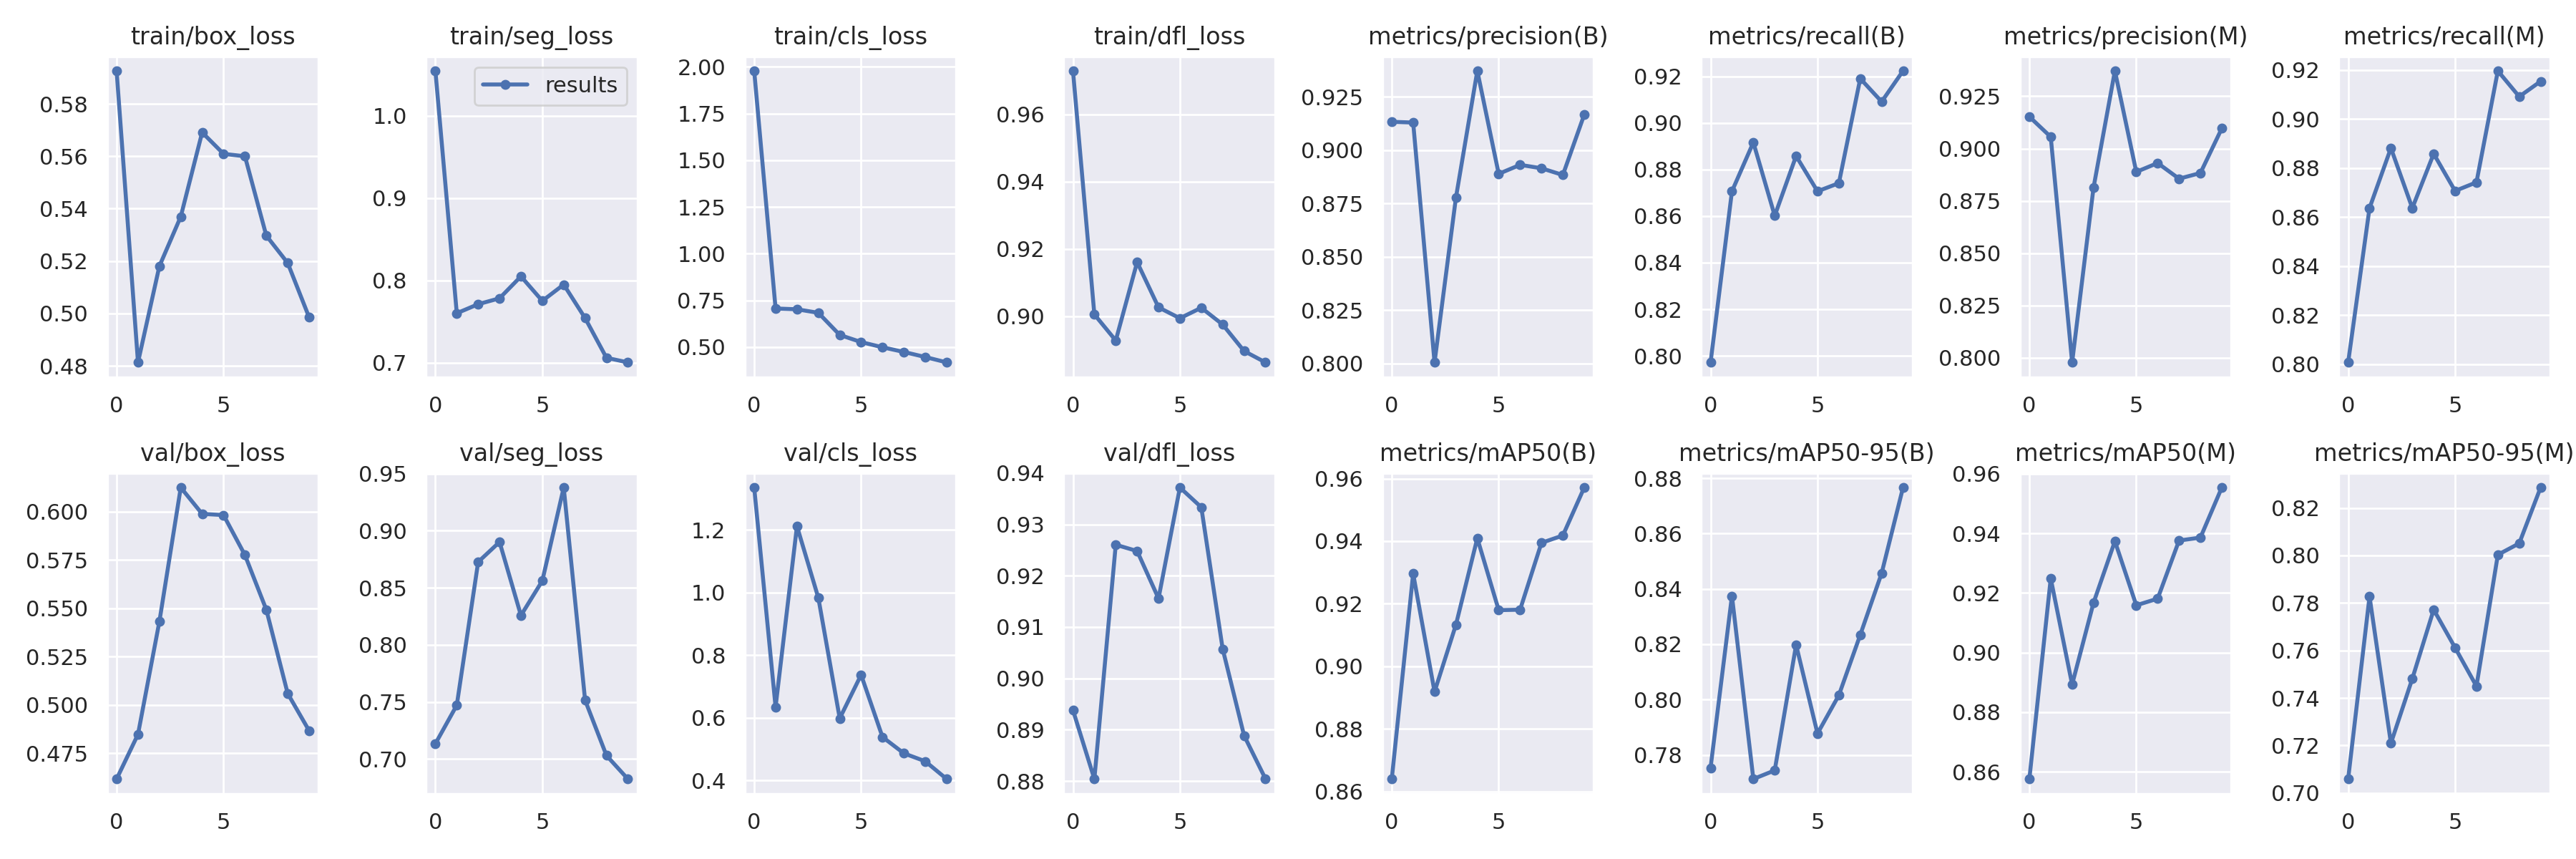

In [ ]:
# Menampilkan gambar grafik-grafik variasi metrik YOLOv8x
Image(filename=f'runs/segment/train7/results.png', width=600)

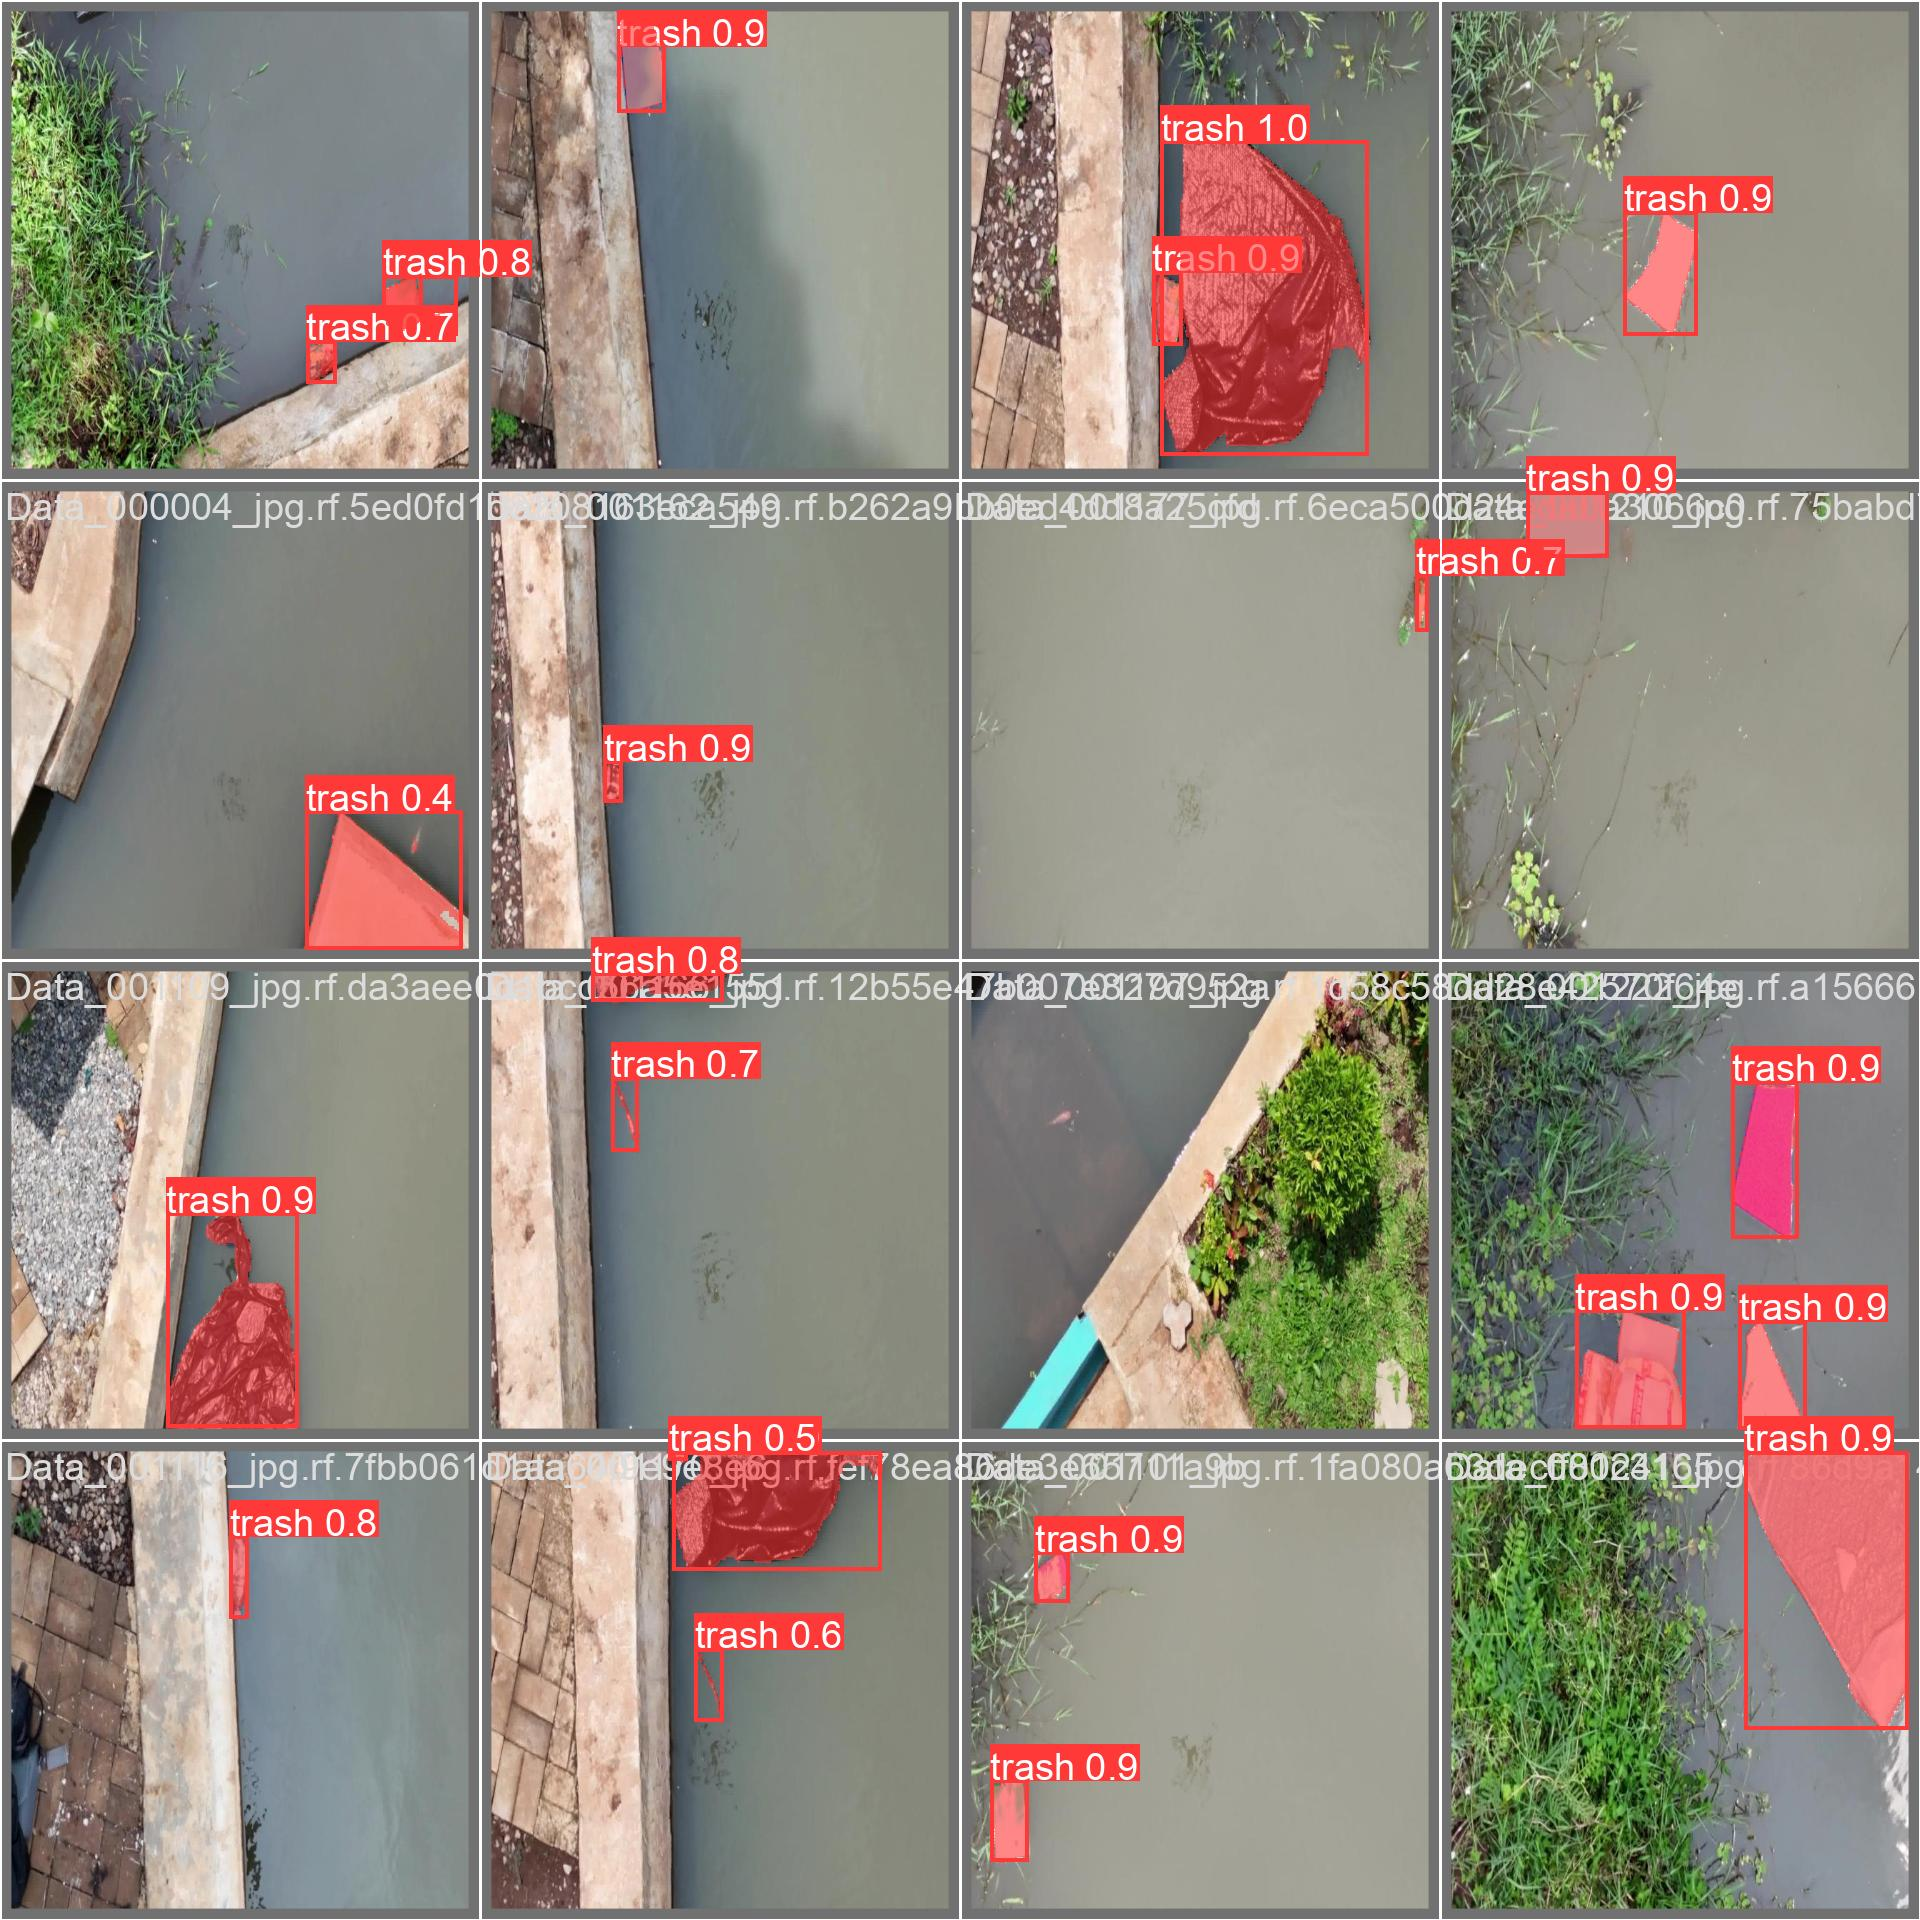

In [ ]:
# Menampilkan gambar hasil prediksi validasi YOLOv8x
Image(filename=f'runs/segment/train7/val_batch0_pred.jpg', width=600)

In [ ]:
# Menilai kinerja model segmentasi pada kumpulan data validasi YOLOv8x
!yolo task=segment mode=val model=runs/segment/train7/weights/best.pt data=data.yaml

2023-12-20 23:47:28.120524: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-20 23:47:28.120576: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-20 23:47:28.121868: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-20 23:47:29.341859: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71721619 parameters, 0 gradients, 343.7 GFLOPs
val: Scanning /content/drive/MyDrive/Colab Notebooks/UAS-ML/trash/

In [ ]:
# Melakukan prediksi pada gambar test set YOLOv8x
!yolo task=segment mode=predict model=runs/segment/train7/weights/best.pt conf=0.25 source=trash/test/images save=true

2023-12-20 23:48:42.847253: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-20 23:48:42.847313: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-20 23:48:42.848863: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-20 23:48:44.072846: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71721619 parameters, 0 gradients, 343.7 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/99 /content/dri

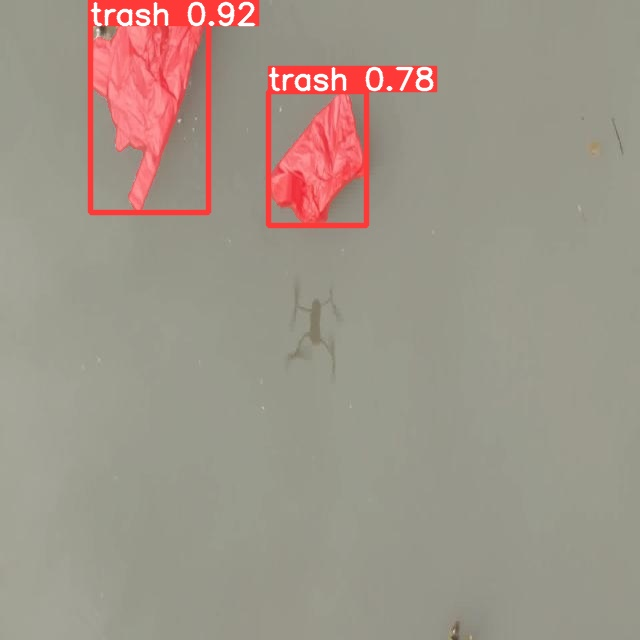

In [ ]:
# Menampilkan gambar hasil prediksi pada test set YOLOv8x
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict9/Data_000259_jpg.rf.dc4fb855338773ad8ae4a039213f7ac6.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")